# **EDA -**

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying structure, patterns, and relationships within a dataset before applying any machine learning models or statistical techniques. Below is a comprehensive explanation of the EDA process for the given liver disease dataset.

# 1. Loading the Data

First, import the necessary libraries and load the dataset into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/refs/heads/main/Dataset/Liver-Disease%20Project%20dataset.csv')

df

category  age sex  albumin  alkaline_phosphatase  \
0     no_disease   32   m     38.5                  52.5   
1     no_disease   32   m     38.5                  70.3   
2     no_disease   32   m     46.9                  74.7   
3     no_disease   32   m     43.2                  52.0   
4     no_disease   32   m     39.2                  74.1   
..           ...  ...  ..      ...                   ...   
610    cirrhosis   62   f     32.0                 416.6   
611    cirrhosis   64   f     24.0                 102.8   
612    cirrhosis   64   f     29.0                  87.3   
613    cirrhosis   46   f     33.0                   NaN   
614    cirrhosis   59   f     36.0                   NaN   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                         7.7                        22.1        7.5   
1                        18.0                        24.7        3.9   
2                        36.2                        52.6        6.1   
3                        30.6                        22.6       18.9   
4                        32.6                        24.8        9.6   
..                        ...                         ...        ...   
610                       5.9                       110.3       50.0   
611                       2.9                        44.4       20.0   
612                       3.5                        99.0       48.0   
613                      39.0                        62.0       20.0   
614                     100.0                        80.0       12.0   

     cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0              6.93         3.23       106.0                         12.1   
1             11.17         4.80        74.0                         15.6   
2              8.84         5.20        86.0                         33.2   
3              7.33         4.74        80.0                         33.8   
4              9.15         4.32        76.0                         29.9   
..              ...          ...         ...                          ...   
610            5.57         6.30        55.7                        650.9   
611            1.54         3.02        63.0                         35.9   
612            1.66         3.63        66.7                         64.2   
613            3.56         4.20        52.0                         50.0   
614            9.07         5.30        67.0                         34.0   

    protein     
0           69  
1         76.5  
2         79.3  
3         75.7  
4         68.7  
..         ...  
610       68.5  
611       71.3  
612         82  
613         71  
614         68  

[615 rows x 13 columns]

#2.Understanding the Data Structure

*Shape of the Data*

In [3]:
# Check the shape of the dataset: number of rows and columns.

print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

#or

#df.shape

The dataset contains 615 rows and 13 columns.


*First Few Rows*

In [4]:
df.head()

category  age sex  albumin  alkaline_phosphatase  \
0   no_disease   32   m     38.5                  52.5   
1   no_disease   32   m     38.5                  70.3   
2   no_disease   32   m     46.9                  74.7   
3   no_disease   32   m     43.2                  52.0   
4   no_disease   32   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6                        24.8        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0            6.93         3.23       106.0                         12.1   
1           11.17         4.80        74.0                         15.6   
2            8.84         5.20        86.0                         33.2   
3            7.33         4.74        80.0                         33.8   
4            9.15         4.32        76.0                         29.9   

  protein     
0         69  
1       76.5  
2       79.3  
3       75.7  
4       68.7

In [5]:
df.columns.values

array(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase',
       'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '], dtype=object)

*Data Types and Non-Null Counts*

In [6]:
#Understand data types (categorical, numerical).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [7]:
# Convert the 'protein   ' column to numeric, handling errors
df['protein   '] = pd.to_numeric(df['protein   '], errors='coerce')

# Fill NaN values with the mean of the numeric values
df['protein   '].fillna(df['protein   '].mean(), inplace=True)

**Statistical Summary**

*Descriptive Statistics for Numerical Columns*

In [8]:
df.describe()

age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  614.000000            597.000000                614.000000   
mean    47.408130   41.620195             68.283920                 28.450814   
std     10.055105    5.780629             26.028315                 25.469689   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.500000                 16.400000   
50%     47.000000   41.950000             66.200000                 23.000000   
75%     54.000000   45.200000             80.100000                 33.075000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   605.000000   
mean                    34.786341   11.396748        8.196634     5.368099   
std                     33.090690   19.673150        2.205657     1.132728   
min                     10.600000    0.800000        1.420000     1.430000   
25%                     21.600000    5.300000        6.935000     4.610000   
50%                     25.900000    7.300000        8.260000     5.300000   
75%                     32.900000   11.200000        9.590000     6.060000   
max                    324.000000  254.000000       16.410000     9.670000   

        creatinina  gamma_glutamyl_transferase   protein     
count   615.000000                   615.000000  615.000000  
mean     81.287805                    39.533171   72.044137  
std      49.756166                    54.661071    5.398234  
min       8.000000                     4.500000   44.800000  
25%      67.000000                    15.700000   69.300000  
50%      77.000000                    23.300000   72.200000  
75%      88.000000                    40.200000   75.400000  
max    1079.100000                   650.900000   90.000000

*Descriptive Statistics for Categorical Columns*

In [9]:
#df.describe(include='object')    # Or

df.describe(include=['object'])

category  sex
count           615  615
unique            5    2
top      no_disease    m
freq            533  377

In [10]:
from sklearn.preprocessing import StandardScaler

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True) # drop_first avoids multicollinearity

sc = StandardScaler()

x = sc.fit_transform(df_encoded)
x

array([[-1.53361617, -0.54020751, -0.60692194, ...,  0.39223227,
        -0.10729938,  0.79454373],
       [-1.53361617, -0.54020751,  0.07752215, ...,  0.39223227,
        -0.10729938,  0.79454373],
       [-1.53361617,  0.91410623,  0.24671058, ...,  0.39223227,
        -0.10729938,  0.79454373],
       ...,
       [ 1.65143725, -2.1849671 ,  0.73120471, ..., -2.54950976,
        -0.10729938, -1.25858397],
       [-0.1401553 , -1.49243674,         nan, ..., -2.54950976,
        -0.10729938, -1.25858397],
       [ 1.15377266, -0.97303898,         nan, ..., -2.54950976,
        -0.10729938, -1.25858397]])

#3.Handling Missing Values

*Counting Missing Values per Column*

In [11]:
df.isnull().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

*Drop Missing Values*

In [12]:
#df.dropna(inplace=True)

**Impute Missing Values**

*For Numerical Columns*

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['albumin'] = imputer.fit_transform(df[['albumin']])
df['alkaline_phosphatase'] = imputer.fit_transform(df[['alkaline_phosphatase']])
df['alanine_aminotransferase'] = imputer.fit_transform(df[['alanine_aminotransferase']])
df['cholesterol'] = imputer.fit_transform(df[['cholesterol']])

#df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)

*For Categorical Columns*

In [14]:
df['category'].fillna(df['category'].mode()[0], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      615 non-null    float64
 4   alkaline_phosphatase         615 non-null    float64
 5   alanine_aminotransferase     615 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  615 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    float64
dtypes: float64(10), int6

In [16]:
df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

#4.Data Cleaning

*Standardizing Column Names*

*Renaming Columns*

In [26]:
# Rename Multiple Columns name.

df.rename(columns={
    'gamma_glutamyl_transferase_': 'gamma_glutamyl_transferase',
    'protein___': 'protein',
}, inplace=True)

# Display the updated column names to confirm the changes.

print("Updated column names:", df.columns.tolist())

Updated column names: ['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina', 'gamma_glutamyl_transferase ', 'protein   ']


**Correcting Data Types**

*Converting 'sex' to Categorical*

In [18]:
#df['sex'] = df['sex'].astype('category')

**Encoding Categorical Variables**

*Label Encoding*

In [19]:
'''
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])  # 0: no_disease, 1: disease
df['sex'] = le.fit_transform(df['sex'])  # 0: female, 1: male
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\n# Encode target variable\nle = LabelEncoder()\ndf['category'] = le.fit_transform(df['category'])  # 0: no_disease, 1: disease\ndf['sex'] = le.fit_transform(df['sex'])  # 0: female, 1: male\n"

*One-Hot Encoding*

In [20]:
# df = pd.get_dummies(df, columns=['sex'], drop_first = True)

In [21]:
df.head()

category  age sex  albumin  alkaline_phosphatase  \
0   no_disease   32   m     38.5                  52.5   
1   no_disease   32   m     38.5                  70.3   
2   no_disease   32   m     46.9                  74.7   
3   no_disease   32   m     43.2                  52.0   
4   no_disease   32   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6                        24.8        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0            6.93         3.23       106.0                         12.1   
1           11.17         4.80        74.0                         15.6   
2            8.84         5.20        86.0                         33.2   
3            7.33         4.74        80.0                         33.8   
4            9.15         4.32        76.0                         29.9   

   protein     
0        69.0  
1        76.5  
2        79.3  
3        75.7  
4        68.7

In [22]:
df['category'].value_counts()   # to check class distribution.

category
 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

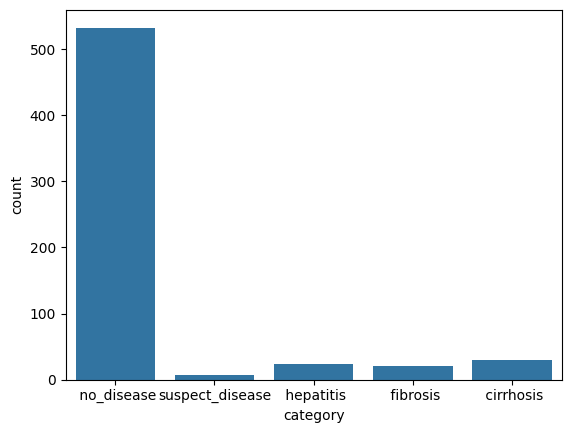

In [23]:
# Count Plots for categorical features.

sns.countplot(x='category', data=df)

In [24]:
df['sex'].value_counts()

sex
m    377
f    238
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

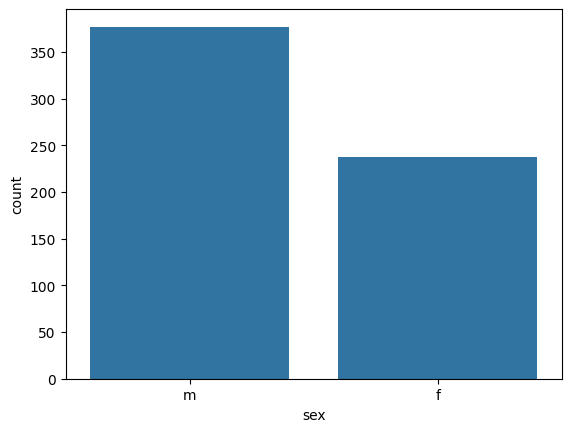

In [25]:
# Count Plots for categorical features.

sns.countplot(x='sex', data=df)

#5.Exploratory Visualizations

**1. Univariate Analysis**

*Histogram*

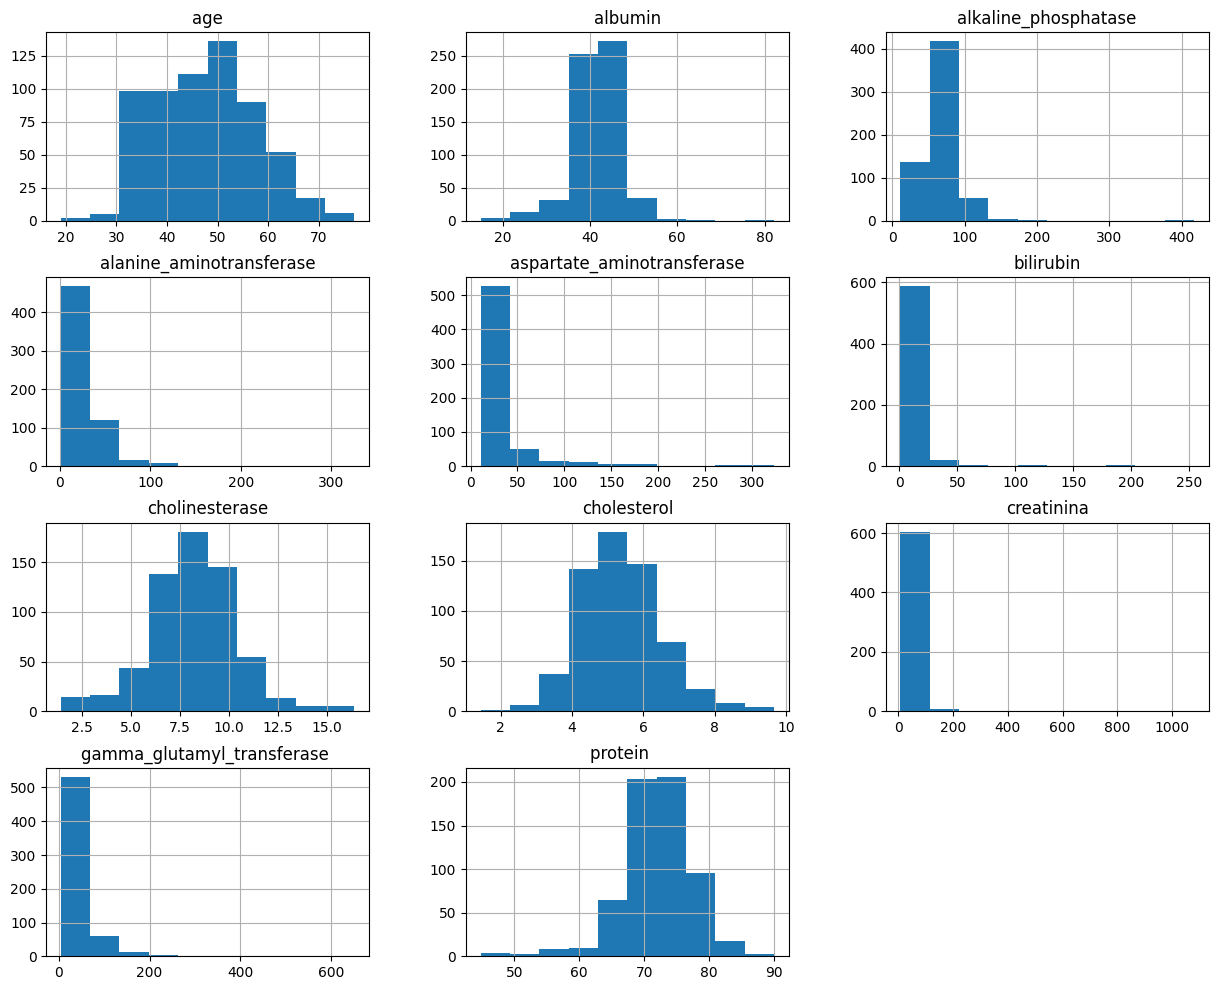

In [ ]:
# Histograms: For numerical data distribution.

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(15, 12))
plt.show()

In [ ]:
df.skewness = df[numerical_cols].skew()
df.skewness

age                             0.267134
albumin                        -0.176911
alkaline_phosphatase            4.724225
alanine_aminotransferase        5.510574
aspartate_aminotransferase      4.940327
bilirubin                       8.385437
cholinesterase                 -0.110233
cholesterol                     0.378906
creatinina                     15.169291
gamma_glutamyl_transferase      5.632734
protein                        -0.964468
dtype: float64

**Correlation Analysis**

*Identifying Strong Correlations*

In [ ]:
df.corr = df[numerical_cols].corr()
df.corr

age   albumin  alkaline_phosphatase  \
age                          1.000000 -0.197005              0.168473   
albumin                     -0.197005  1.000000             -0.138858   
alkaline_phosphatase         0.168473 -0.138858              1.000000   
alanine_aminotransferase    -0.006017  0.001606              0.172461   
aspartate_aminotransferase   0.088666 -0.193397              0.062202   
bilirubin                    0.032492 -0.221650              0.048600   
cholinesterase              -0.075093  0.375848              0.032971   
cholesterol                  0.123978  0.204803              0.121914   
creatinina                  -0.022296 -0.001573              0.149554   
gamma_glutamyl_transferase   0.153087 -0.155555              0.442262   
protein                     -0.153665  0.550033             -0.053633   

                             alanine_aminotransferase  \
age                                         -0.006017   
albumin                                      0.001606   
alkaline_phosphatase                         0.172461   
alanine_aminotransferase                     1.000000   
aspartate_aminotransferase                   0.273325   
bilirubin                                   -0.038468   
cholinesterase                               0.146953   
cholesterol                                  0.068023   
creatinina                                  -0.043025   
gamma_glutamyl_transferase                   0.248086   
protein                                      0.094373   

                             aspartate_aminotransferase  bilirubin  \
age                                            0.088666   0.032492   
albumin                                       -0.193397  -0.221650   
alkaline_phosphatase                           0.062202   0.048600   
alanine_aminotransferase                       0.273325  -0.038468   
aspartate_aminotransferase                     1.000000   0.312231   
bilirubin                                      0.312231   1.000000   
cholinesterase                                -0.208536  -0.333172   
cholesterol                                   -0.207507  -0.156261   
creatinina                                    -0.021387   0.031224   
gamma_glutamyl_transferase                     0.491263   0.217024   
protein                                        0.039888  -0.041309   

                             cholinesterase  cholesterol  creatinina  \
age                               -0.075093     0.123978   -0.022296   
albumin                            0.375848     0.204803   -0.001573   
alkaline_phosphatase               0.032971     0.121914    0.149554   
alanine_aminotransferase           0.146953     0.068023   -0.043025   
aspartate_aminotransferase        -0.208536    -0.207507   -0.021387   
bilirubin                         -0.333172    -0.156261    0.031224   
cholinesterase                     1.000000     0.420163   -0.011157   
cholesterol                        0.420163     1.000000   -0.047667   
creatinina                        -0.011157    -0.047667    1.000000   
gamma_glutamyl_transferase        -0.110345    -0.006828    0.121003   
protein                            0.293184     0.206546   -0.031693   

                             gamma_glutamyl_transferase   protein     
age                                             0.153087   -0.153665  
albumin                                        -0.155555    0.550033  
alkaline_phosphatase                            0.442262   -0.053633  
alanine_aminotransferase                        0.248086    0.094373  
aspartate_aminotransferase                      0.491263    0.039888  
bilirubin                                       0.217024   -0.041309  
cholinesterase                                 -0.110345    0.293184  
cholesterol                                    -0.006828    0.206546  
creatinina                                      0.121003   -0.031693  
gamma_glutamyl_transferase                      1.000000

*Box Plots*

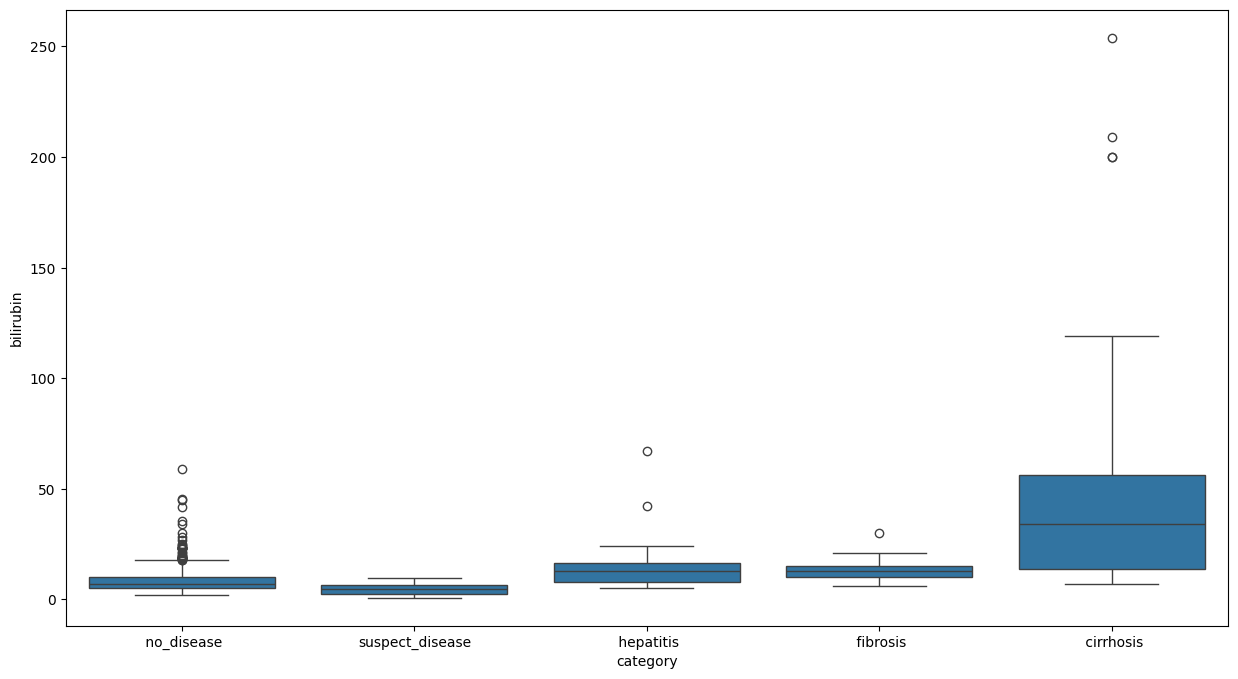

In [ ]:
# Boxplot to analyze distribution of numerical features by category.

plt.figure(figsize=(15, 8))
sns.boxplot(x='category', y='bilirubin', data=df)
plt.show()

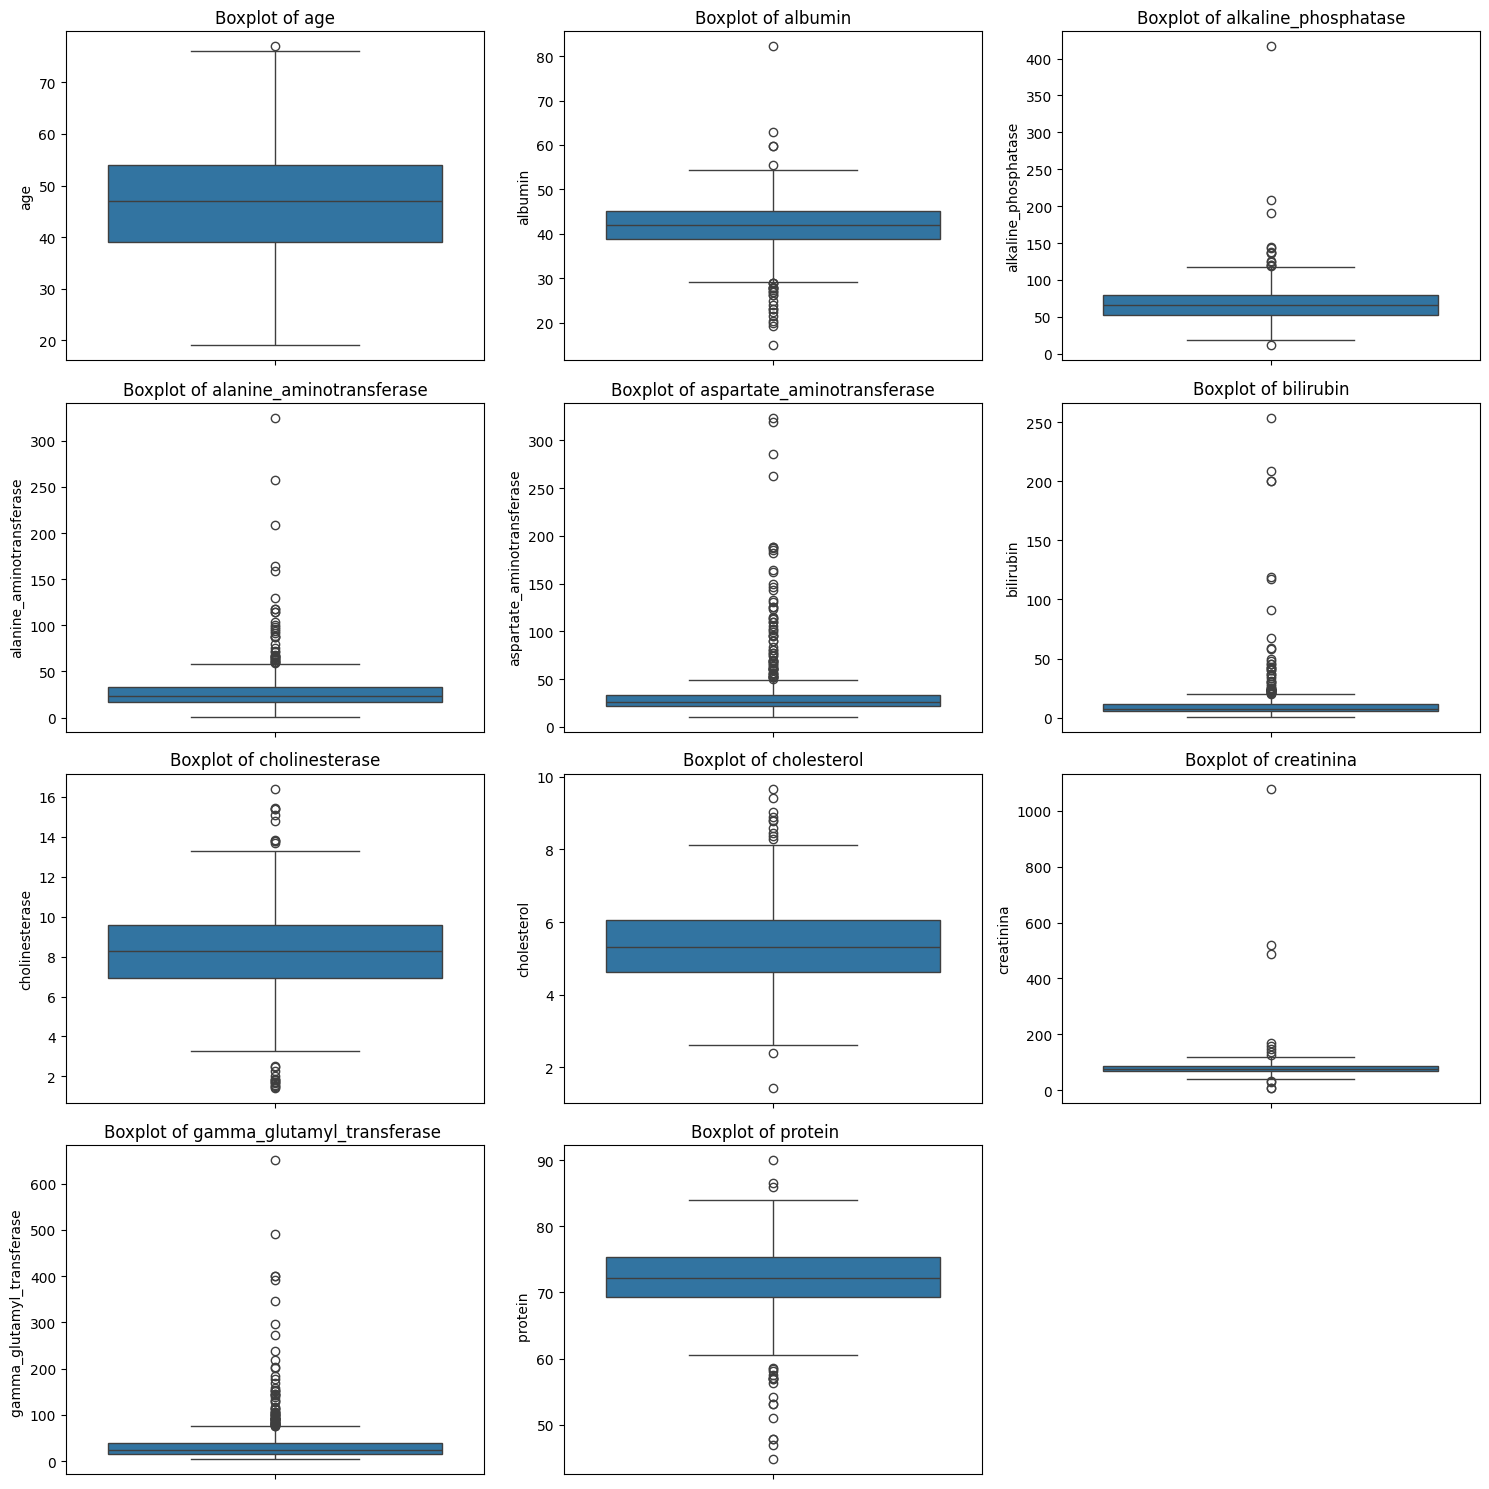

In [ ]:
# OR Boxplots for detecting outliers.

plt.figure(figsize=(15, 15))
data_numeric = df.drop(columns=['category','sex'])  # Excluded the 'category' column for outlier detection.
for i, column in enumerate(data_numeric.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

**2. Bivariate Analysis**

*Scatter Plots*

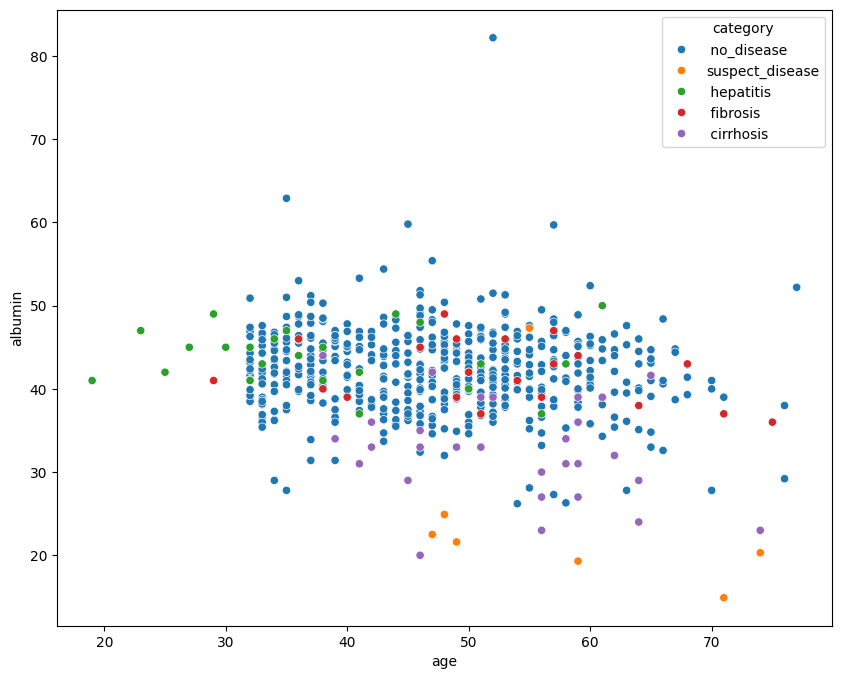

In [ ]:
# Scatter Plot to explore relationships between continuous variables.

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='albumin', hue='category', data=df)
plt.show()

**3.Multivariate Analysis**

*Pair Plot*

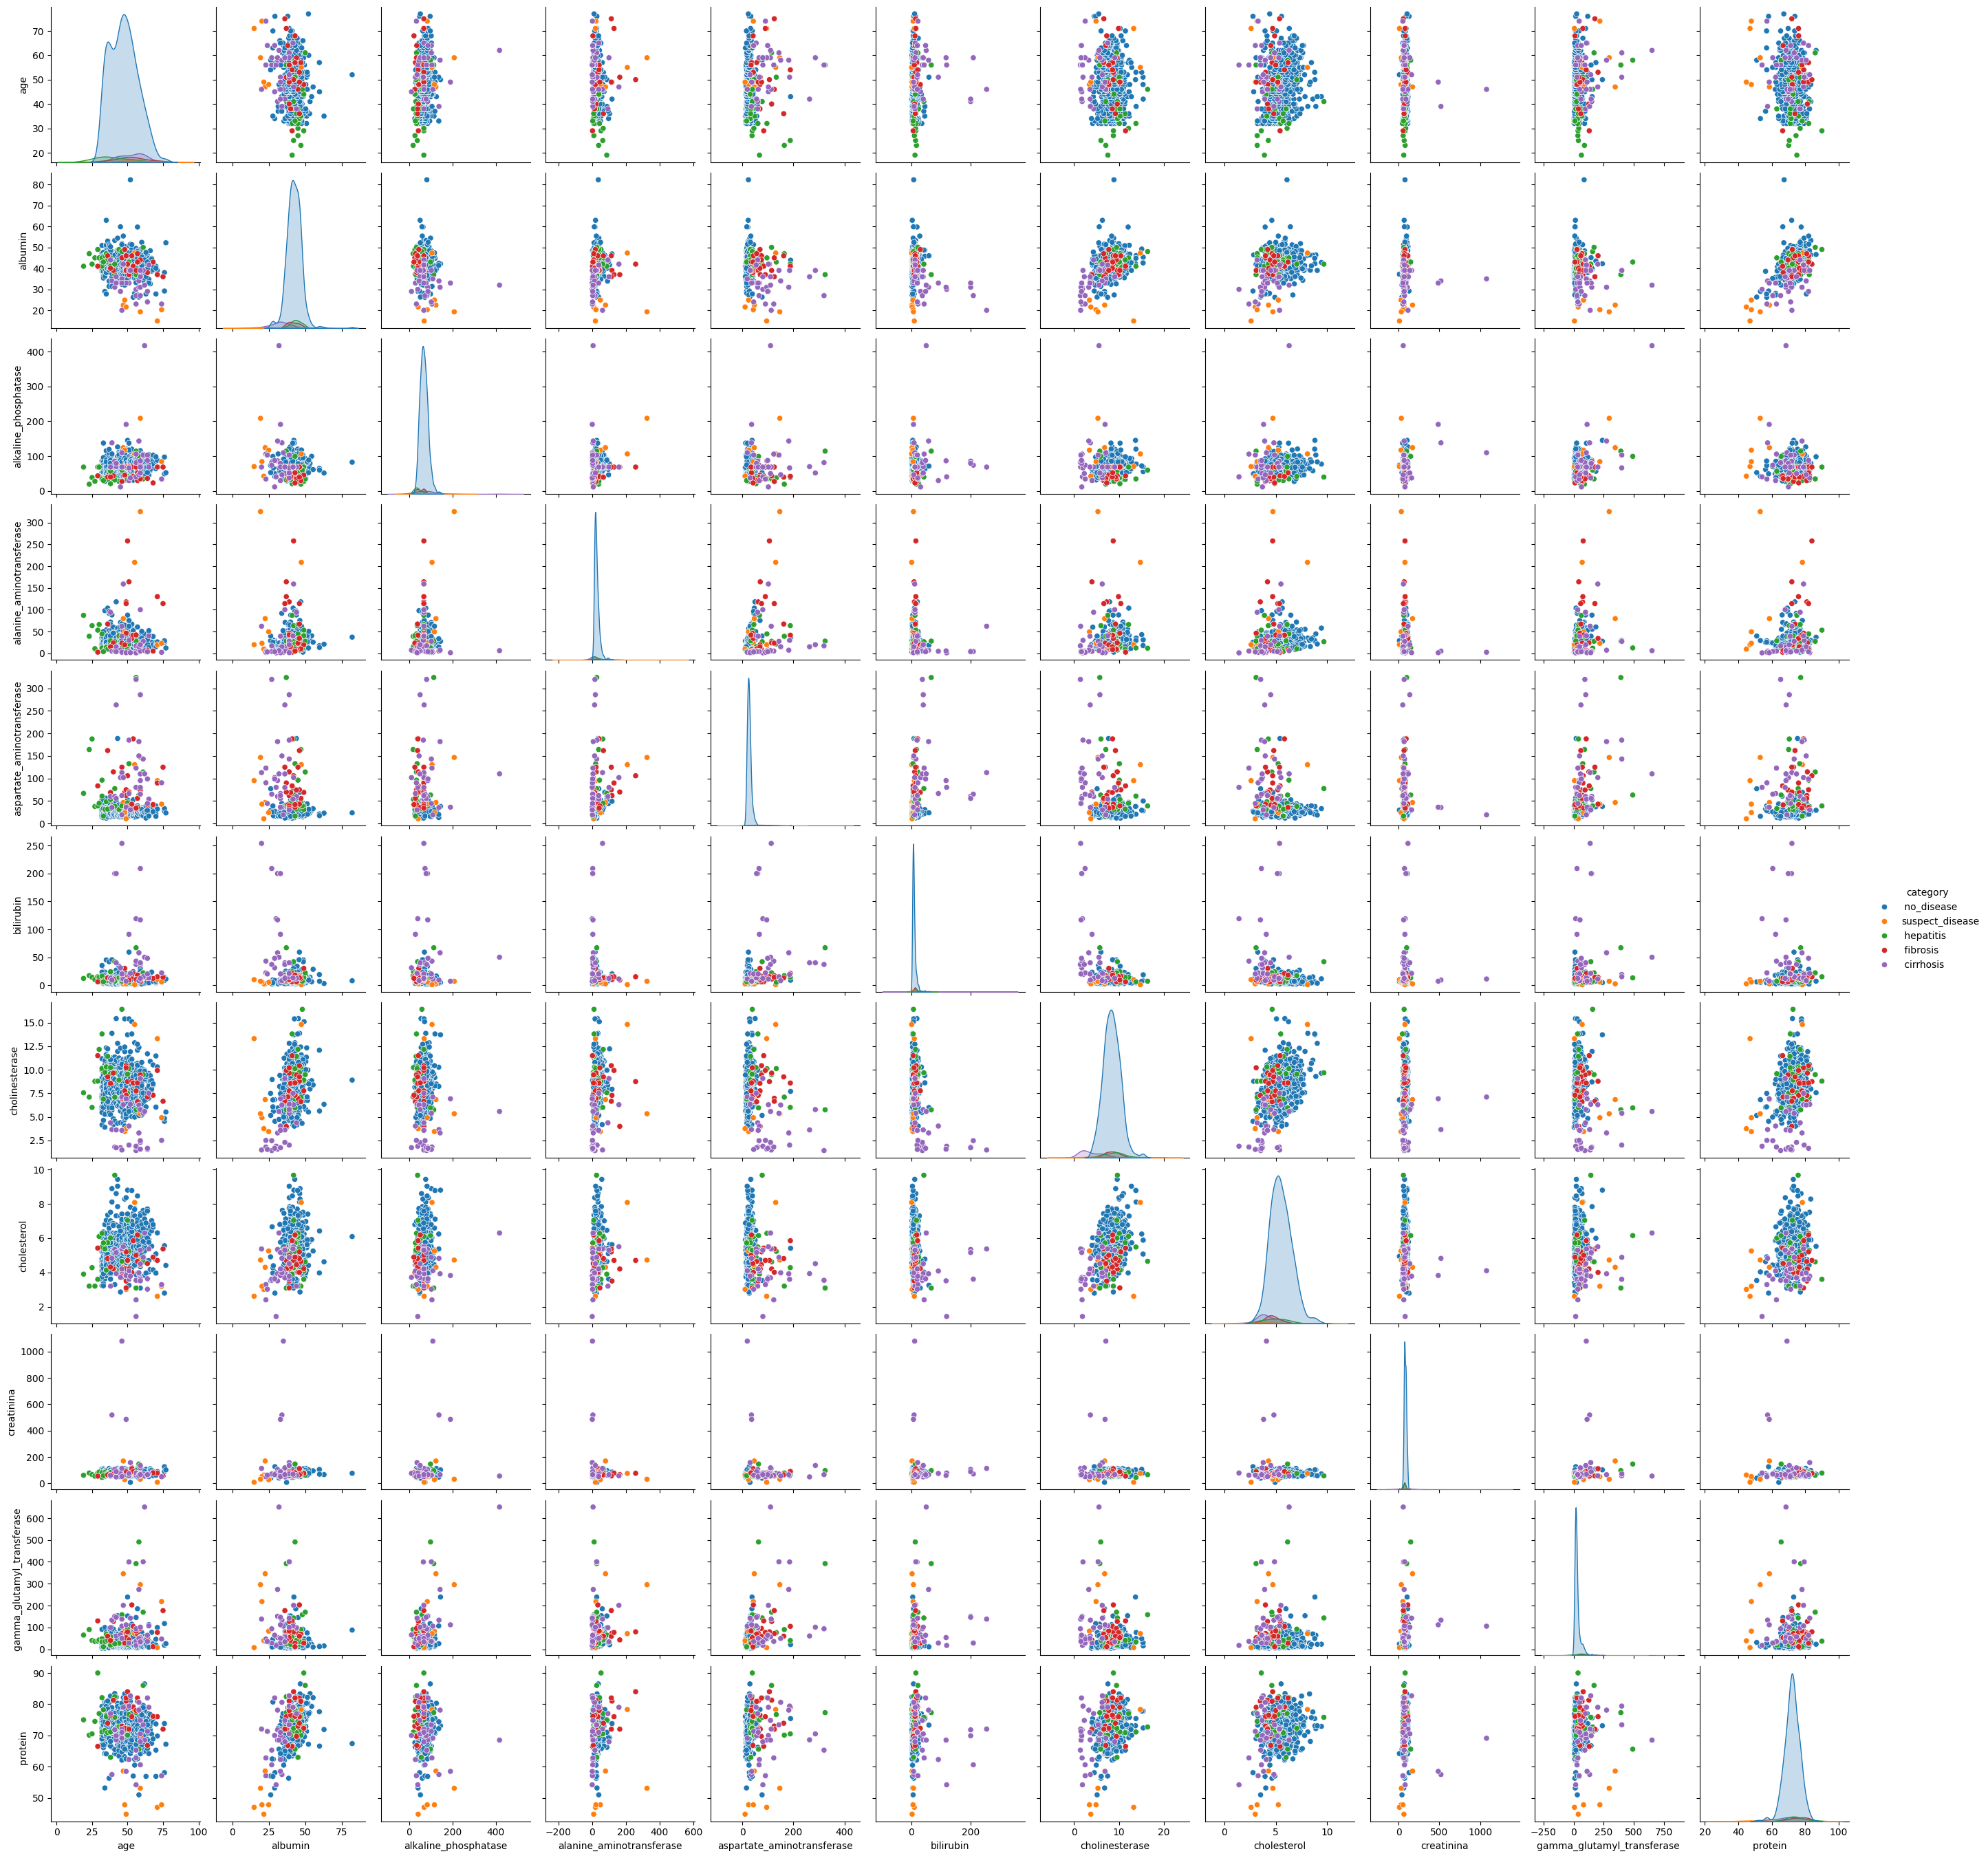

In [ ]:
# Pair Plots: For exploring multivariate relationships.
sns.pairplot(df, hue='category')
plt.show()

# 6.Insights from the Data

**Age Distribution: Determine if liver disease prevalence varies with age.**


*Violin Plot*

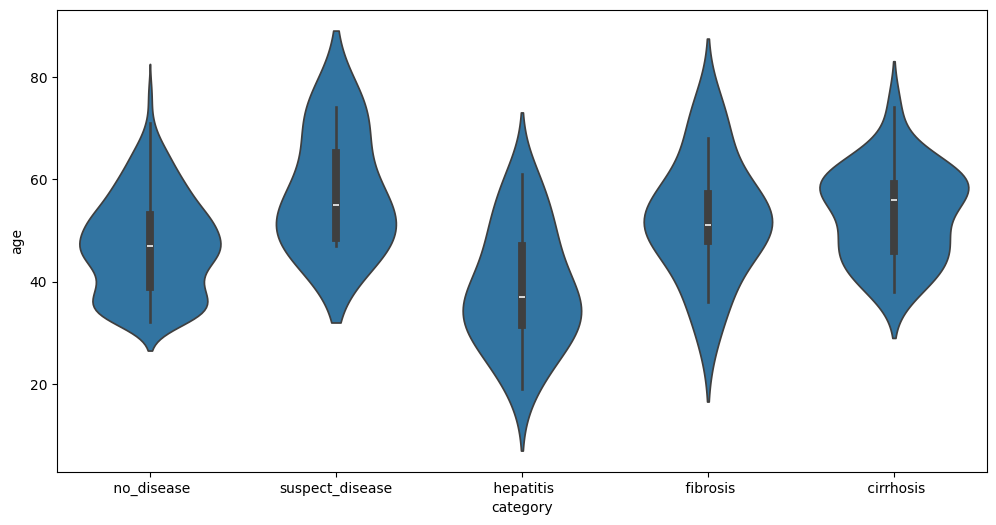

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='age', data=df)
plt.show()

In [ ]:
# Print the column names of your DataFrame to check the actual name of the 'sex' column.
print(df.columns)

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')


**Gender Distribution: Analyze the distribution of liver disease across genders.**

*Count Plot*

Number of male:  377
Number of female:  238


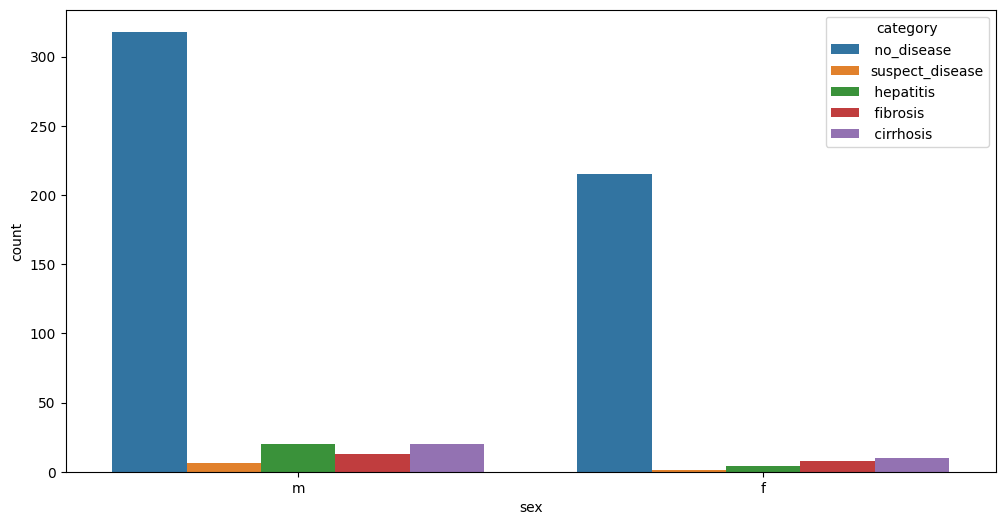

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='sex', hue='category', data=df)
male, female = df['sex'].value_counts()

print('Number of male: ',male)
print('Number of female: ',female)

plt.show()

**Enzyme Levels: Investigate if certain enzyme levels are higher in individuals with liver disease.**

*Correlation Heatmap*

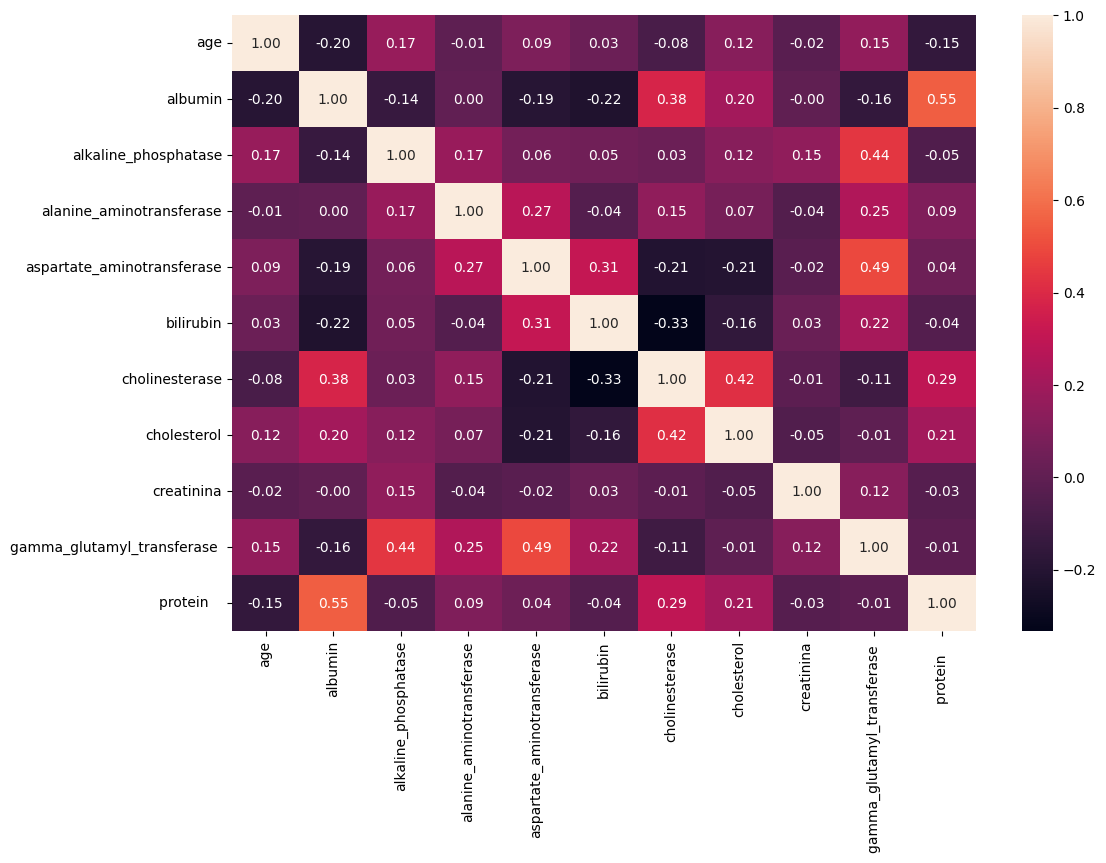

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert columns with 'object' dtype to numerical if possible, excluding 'category'.
# Columns with non-numerical data that can't be converted will be dropped.
for col in df.select_dtypes(include=['object']).columns:
    if col == 'category':  # Skip the 'category' column
        continue
    try:
        # Attempt to convert the column to numeric, handling errors
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Use errors='coerce' to handle invalid values
    except ValueError:
        print(f"Warning: Column '{col}' contains non-numerical data and will be excluded from correlation.")
        df = df.drop(columns=[col])  # Drop the problematic column

# Before calculating correlation, drop non-numeric columns or convert them to numeric
# Drop the category column since it's non-numeric and causes issues with correlation
df_numeric = df.drop(columns=['category','sex'])

# Alternatively, If you want to include 'category' in correlation, convert it to numerical using one-hot encoding:
# df_numeric = pd.get_dummies(df, columns=['category'], drop_first=True)

# Calculate and plot the correlation matrix using only numeric data.
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')
plt.show()

#7.Statistical Analysis

**2.Outlier Detection**

*Using Z-Score*

In [ ]:
# Z-Score: Detect outliers in single column using the Z-score method.

'''from scipy import stats
df['z_score'] = stats.zscore(df['bilirubin'])
outliers = df[df['z_score'] > 3]'''

"from scipy import stats\ndf['z_score'] = stats.zscore(df['bilirubin'])\noutliers = df[df['z_score'] > 3]"

*Using IQR Method*

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers only for numerical columns, then use the index to filter the original DataFrame
iqr_outliers = df[((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

'Q1 = df[numerical_cols].quantile(0.25)\nQ3 = df[numerical_cols].quantile(0.75)\nIQR = Q3 - Q1\n\n# Filter outliers only for numerical columns, then use the index to filter the original DataFrame\niqr_outliers = df[((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]'

**Download csv file**

In [ ]:
#df.to_csv('liver_disease_for_mb.csv')

#Conclusion -

The EDA process helps in understanding the dataset's structure, identifying missing values, correcting data types, and uncovering patterns and relationships. Key analysis include:

*   Missing values need to be handled appropriately to avoid bias in the analysis.
*   There may be a correlation between age and liver disease prevalence.
*   Certain enzymes like alanine_aminotransferase and aspartate_aminotransferase might be elevated in individuals with liver disease.

---



#**MODEL BUILDING & MODEL EVALUATION -**

# Data Preprocessing for Model

**Feature Selection & Train-Test Split**

In [ ]:
#df['sex'] = df['sex'].astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])  # 0: no_disease, 1: disease
df['sex'] = le.fit_transform(df['sex'])  # 0: female, 1: male

In [ ]:
sex = df['sex'].map({0: 'female', 1: 'male'})

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create an instance of the StandardScaler class.
scaled_features = scaler.fit_transform(df.drop(columns=['category']))

In [ ]:
df.columns.values

array(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase',
       'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['category'])  # Excluded the 'category' column for the model.
y = df['category']  # Target variable is 'category'.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training 80% and testing 20% sets.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(492, 12)
(492,)
(123, 12)
(123,)


In [ ]:
X

age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0     32    0     38.5              52.50000                       7.7   
1     32    0     38.5              70.30000                      18.0   
2     32    0     46.9              74.70000                      36.2   
3     32    0     43.2              52.00000                      30.6   
4     32    0     39.2              74.10000                      32.6   
..   ...  ...      ...                   ...                       ...   
610   62    0     32.0             416.60000                       5.9   
611   64    0     24.0             102.80000                       2.9   
612   64    0     29.0              87.30000                       3.5   
613   46    0     33.0              68.28392                      39.0   
614   59    0     36.0              68.28392                     100.0   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                          22.1        7.5            6.93         3.23   
1                          24.7        3.9           11.17         4.80   
2                          52.6        6.1            8.84         5.20   
3                          22.6       18.9            7.33         4.74   
4                          24.8        9.6            9.15         4.32   
..                          ...        ...             ...          ...   
610                       110.3       50.0            5.57         6.30   
611                        44.4       20.0            1.54         3.02   
612                        99.0       48.0            1.66         3.63   
613                        62.0       20.0            3.56         4.20   
614                        80.0       12.0            9.07         5.30   

     creatinina  gamma_glutamyl_transferase   protein     
0         106.0                         12.1        69.0  
1          74.0                         15.6        76.5  
2          86.0                         33.2        79.3  
3          80.0                         33.8        75.7  
4          76.0                         29.9        68.7  
..          ...                          ...         ...  
610        55.7                        650.9        68.5  
611        63.0                         35.9        71.3  
612        66.7                         64.2        82.0  
613        52.0                         50.0        71.0  
614        67.0                         34.0        68.0  

[615 rows x 12 columns]

In [ ]:
y

0      3
1      3
2      3
3      3
4      3
      ..
610    0
611    0
612    0
613    0
614    0
Name: category, Length: 615, dtype: int64

In [ ]:
X_test

age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
248   55    0     28.1                  65.5                      16.6   
365   39    0     31.4                 106.0                      16.6   
432   48    0     43.7                  50.1                      17.3   
610   62    0     32.0                 416.6                       5.9   
132   44    0     35.5                  81.7                      27.5   
..   ...  ...      ...                   ...                       ...   
281   61    0     45.9                  73.3                      17.1   
291   63    0     45.3                  71.3                      16.6   
250   55    0     41.5                  59.5                      15.4   
11    33    0     46.4                  68.2                      10.3   
336   34    0     41.9                  47.4                      20.8   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
248                        17.5        2.8            5.58         4.39   
365                        17.0        2.4            5.95         5.30   
432                        26.3        8.1            8.15         5.38   
610                       110.3       50.0            5.57         6.30   
132                        29.5        6.4            8.81         6.65   
..                          ...        ...             ...          ...   
281                        24.3        4.8           10.01         4.95   
291                        24.1        5.7            8.92         4.69   
250                        16.2        6.8            6.35         5.22   
11                         20.0        5.7            7.36         4.30   
336                        28.5        8.0            7.66         4.61   

     creatinina  gamma_glutamyl_transferase   protein     
248        65.0                         26.2        62.4  
365        68.0                         22.9        72.3  
432        64.0                         13.4        73.1  
610        55.7                        650.9        68.5  
132        83.0                         24.1        68.0  
..          ...                          ...         ...  
281        88.0                         23.5        70.8  
291        81.0                         19.8        73.7  
250        80.0                         12.4        69.9  
11         79.0                         18.7        68.6  
336        97.0                         11.2        71.9  

[123 rows x 12 columns]

In [ ]:
y_test

248    3
365    3
432    3
610    0
132    3
      ..
281    3
291    3
250    3
11     3
336    3
Name: category, Length: 123, dtype: int64

*Feature Scaling -*

In [ ]:
# Normalize or standardize numerical features for models sensitive to scales (e.g., Logistic Regression or SVM).

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create an instance of the StandardScaler class.
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data.
X_test = scaler.transform(X_test)

# Choosing a Classification Algorithm.

**This is a binary classification problem, several machine learning algorithms can be used.**

**Model Evaluation With Model Building -**

# **Logistic Regression**

**Model Building**

*The Logistic Regression Model*

In [ ]:
from sklearn.linear_model import LogisticRegression   # A simple linear model that estimates the probability of a binary outcome.

lr = LogisticRegression()   # Create an instance of the LogisticRegression class.
lr.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

*Predictions*

In [ ]:
y_pred = lr.predict(X_test)   # Make predictions on the test set.

In [ ]:
y_pred   # Print the predictions.

array([3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       0, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
# Evaluated how accurate the model is by calculating the percentage of correct predictions.

from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')   # Print the accuracy of the model.

Accuracy: 88.62%


*Confusion Matrix*

In [ ]:
# A confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, which helps you understand where the model is making mistakes.

from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')   # Print confusion matrix.
print(conf_matrix)   # Print the confusion matrix.

Confusion Matrix:
[[ 5  0  0  3  1]
 [ 0  3  0  3  0]
 [ 1  2  3  3  0]
 [ 0  0  0 96  0]
 [ 0  0  0  1  2]]


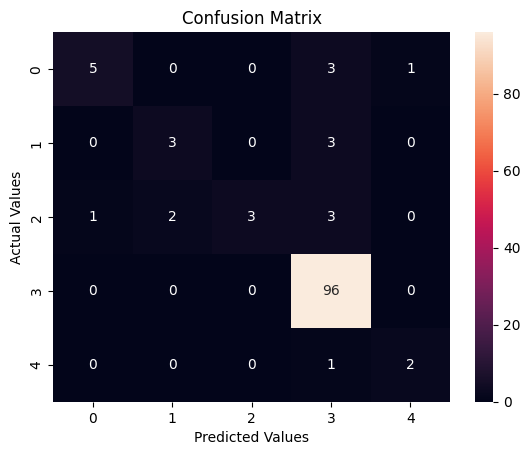

In [ ]:
# Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot = True, fmt = 'd')   # Create a heatmap with a blue color palette.
plt.title('Confusion Matrix')   # Set the title of the heatmap.
plt.ylabel('Actual Values')   # Set the label for the y-axis.
plt.xlabel('Predicted Values')   # Set the label for the x-axis.
plt.show()   # Display the heatmap.

*Model Score*

In [ ]:
lr.score(X_train, y_train)

0.9613821138211383

In [ ]:
lr.score(X_test, y_test)

0.8861788617886179

*Precision, Recall, and F1 Score*

In [ ]:
# These metrics provide deeper insight into model performance, especially in dealing with imbalanced datasets.

from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')   # Print classification report.
print(class_report)   # Print the classification report.

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.60      0.50      0.55         6
           2       1.00      0.33      0.50         9
           3       0.91      1.00      0.95        96
           4       0.67      0.67      0.67         3

    accuracy                           0.89       123
   macro avg       0.80      0.61      0.67       123
weighted avg       0.89      0.89      0.87       123



*ROC Curve and AUC*

ROC Curve: The Receiver Operating Characteristic curve is a graphical plot that illustrates the diagnostic ability of a binary classifier.            
AUC (Area Under the Curve): AUC represents the probability that the model ranks a random positive instance higher than a random negative instance.

AUC: 0.7650985904933273


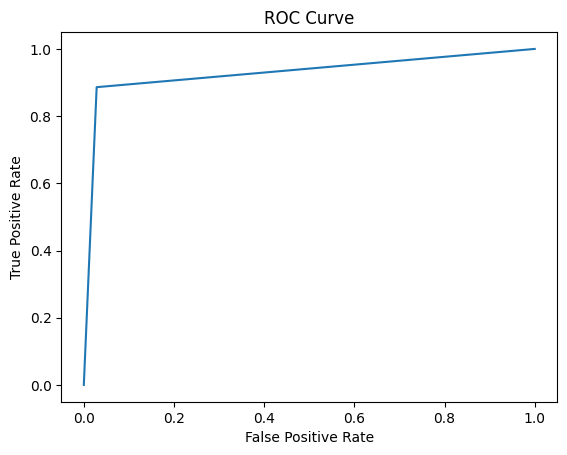

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize # Import label_binarize
import numpy as np # Import numpy

# If y_test and y_pred are not already in one-hot encoded format
# You'll need to binarize them for multiclass ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test)) # changed to y_pred

# Now calculate ROC AUC for multiclass using 'ovr'
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, multi_class='ovr') # Changed variables
print(f'AUC: {roc_auc}')

# For ROC curve, if you want to plot a macro-averaged ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel()) # use binarized to fit
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

*Feature Importance*

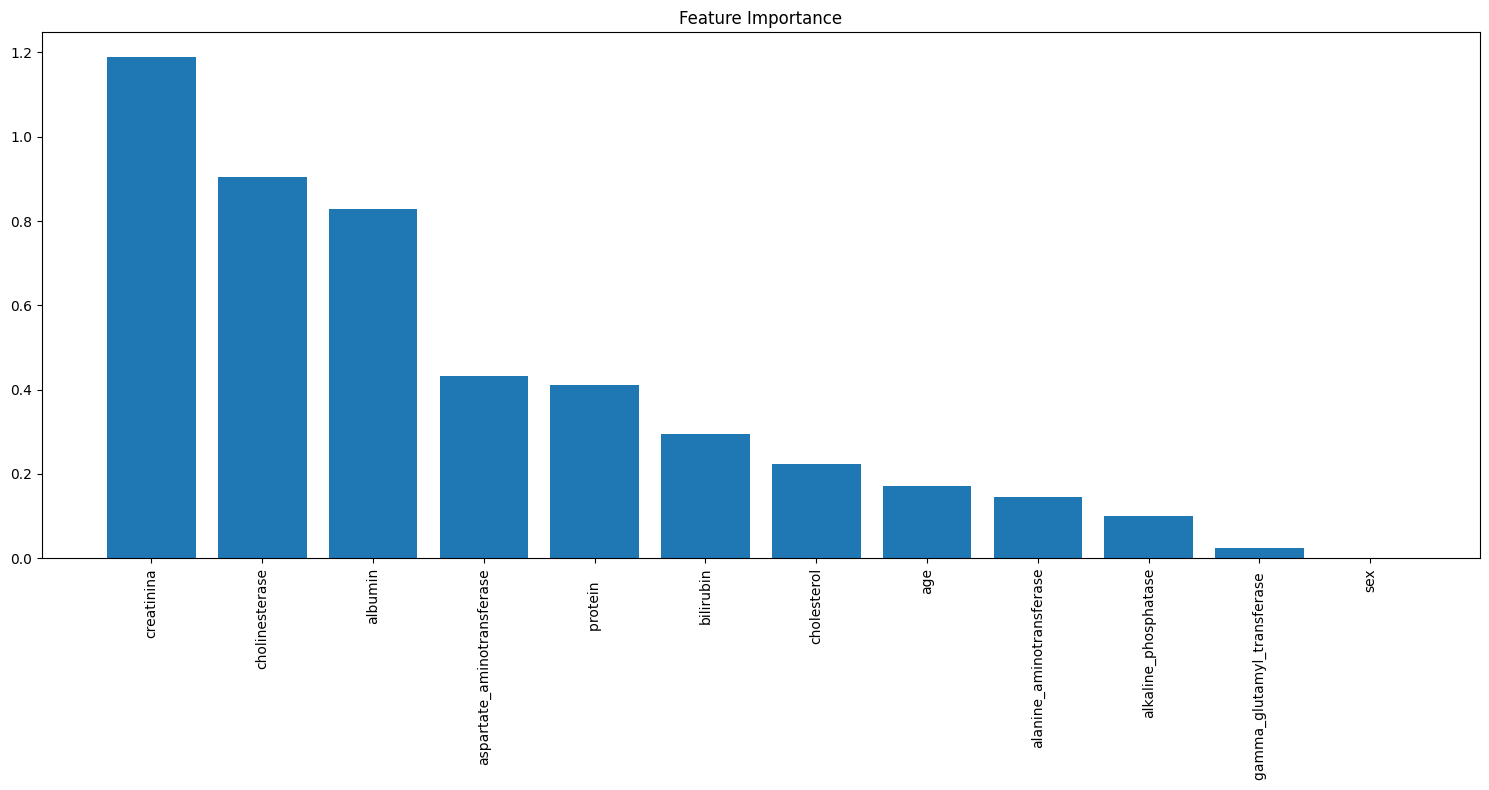

In [ ]:
# Plot Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from coefficients.
# lr.coef_ provides the coefficients. Since coefficients can be negative or positive, we use np.abs to get the absolute values, representing the magnitude of importance.
# [0] is used to access the coefficients for the first class in case of multi-class classification. If it's binary classification, this will be the only set of coefficients.
importances = np.abs(lr.coef_[0])  # lr is your fitted LogisticRegression model
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

*Cross-Validation*

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.8699187  0.92682927 0.94308943 0.88617886 0.91056911]
Mean cross-validation score: 0.9073170731707318


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid with parameters Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

grid_search = GridSearchCV(lr, param_grid, cv=5)   # Created a GridSearchCV object.
grid_search.fit(X_train, y_train)   # Fit the grid search to the training data.

print(f'Best parameters: {grid_search.best_params_}')  # Best hyperparameters.
print(f'Best cross-validation score: {grid_search.best_score_}')  # Accuracy of the best model.

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9390434961863534


# **Random Forest Classifier**

**Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier   # An ensemble method that combines multiple decision trees to improve accuracy.

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

**Model Evaluation**

*Prediction*

In [ ]:
y_pred = rf.predict(X_test)   # Make predictions on the test set.

In [ ]:
y_pred   # Print the predictions.

array([3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.18%


*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')   # Print confusion matrix.
print(conf_matrix)   # Print the confusion matrix

Confusion Matrix:
[[ 7  0  0  2  0]
 [ 0  2  0  4  0]
 [ 0  1  1  7  0]
 [ 0  0  0 96  0]
 [ 0  1  0  2  0]]


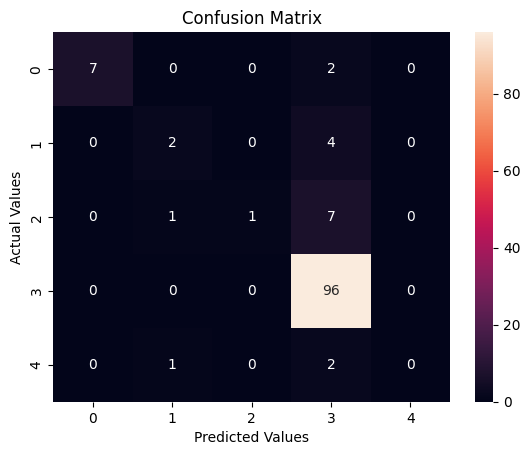

In [ ]:
# Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.

sns.heatmap(conf_matrix, annot = True, fmt = 'd')   # Create a heatmap with a blue color palette.
plt.title('Confusion Matrix')   # Set the title of the heatmap.
plt.ylabel('Actual Values')   # Set the label for the y-axis.
plt.xlabel('Predicted Values')   # Set the label for the x-axis.
plt.show()   # Display the heatmap.

*Precision, Recall and F1 Score*

In [ ]:
from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')   # Print classification report.
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.50      0.33      0.40         6
           2       1.00      0.11      0.20         9
           3       0.86      1.00      0.93        96
           4       0.00      0.00      0.00         3

    accuracy                           0.86       123
   macro avg       0.67      0.44      0.48       123
weighted avg       0.85      0.86      0.82       123



*ROC Curve and AUC*

AUC: 76.51%


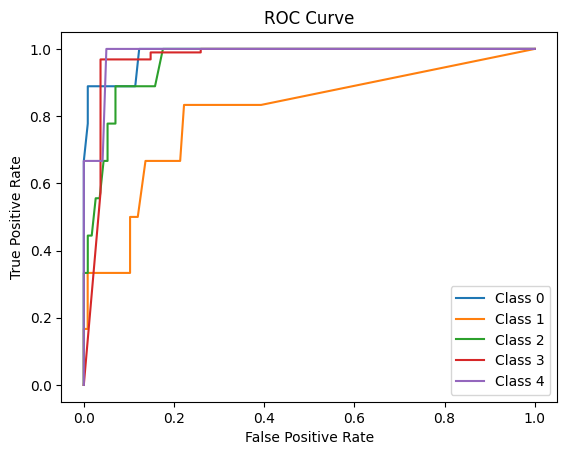

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 'rf' is your trained classifier and 'y_test' and 'X_test' are defined
y_pred_proba = rf.predict_proba(X_test)  # Get predicted probabilities

# Binarize the true labels for multiclass ROC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]  # Number of classes

print(f'AUC: {roc_auc * 100:.2f}%')  # Print AUC

# Calculate and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')  # Assuming binary classification for plotting

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")  # Add a legend for better understanding
plt.show()

*Feature Importance*

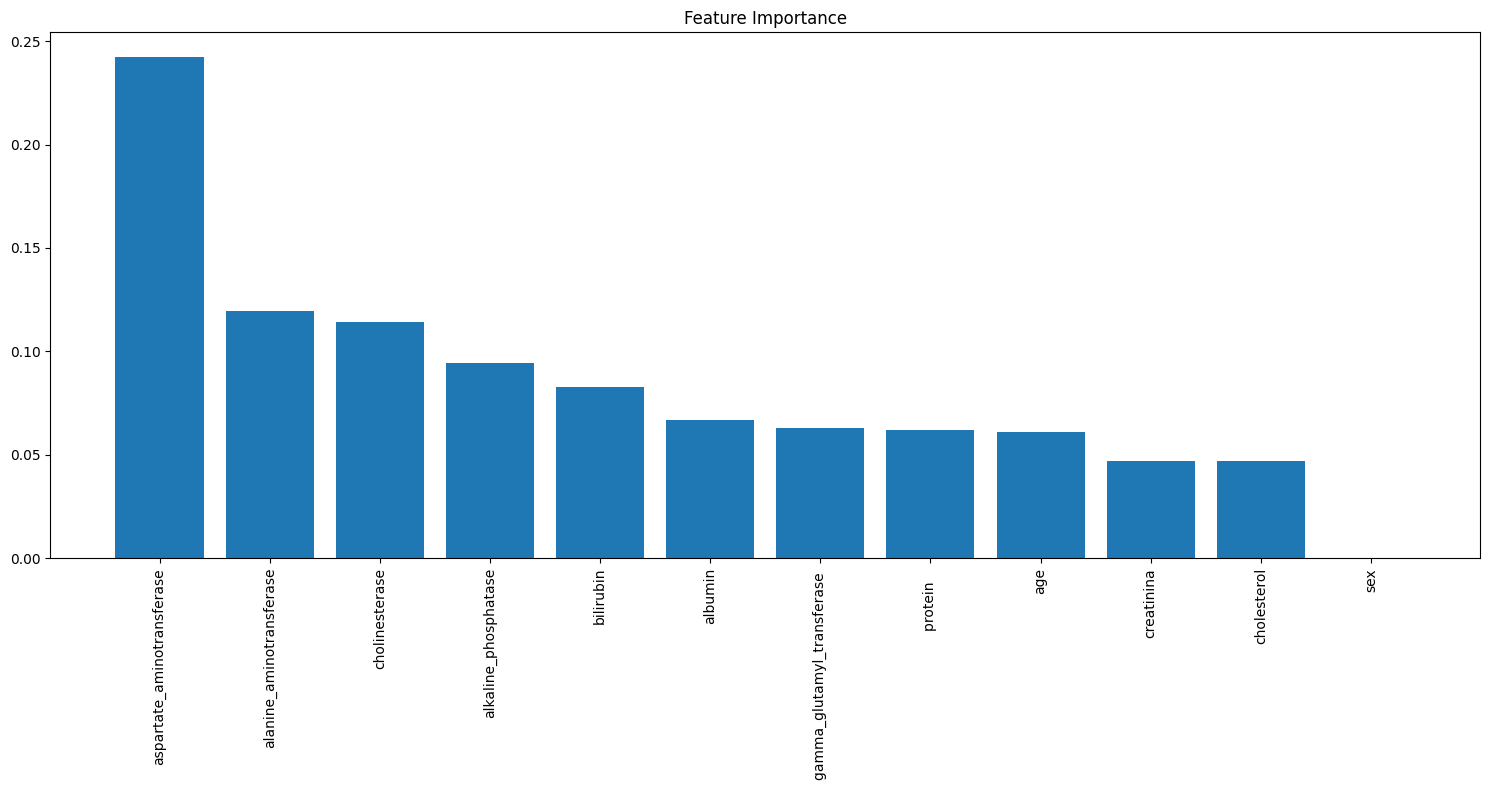

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)
plt.tight_layout()
plt.show()

*Cross Validation Score*

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv = 5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.93495935 0.93495935 0.91869919 0.90243902 0.89430894]
Mean cross-validation score: 0.9170731707317072


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.9369918699186992


# **Support Vector Machine (SVM)**

**Model Building**

In [ ]:
from sklearn.svm import SVC   # A model that finds the optimal hyperplane to classify data points.

svc = SVC(kernel = 'linear')   # You can choose different kernels like 'linear', 'rbf', etc.
svc.fit(X_train, y_train)

SVC(kernel='linear')

**Model Evaluation**

*Prediction*

In [ ]:
y_pred = svc.predict(X_test)   # Make predictions on the test set.

In [ ]:
y_pred   # Print the predictions.

array([3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       0, 1, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 4, 3, 1, 3, 3, 1, 0, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 1, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.93%


*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')   # Print confusion matrix.
print(conf_matrix)   # Print the confusion matrix

Confusion Matrix:
[[ 4  3  1  0  1]
 [ 0  2  0  4  0]
 [ 0  5  2  2  0]
 [ 2  2  0 92  0]
 [ 0  0  0  1  2]]


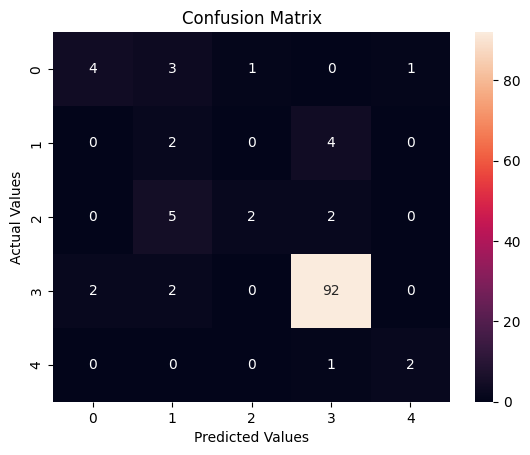

In [ ]:
# Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.

sns.heatmap(conf_matrix, annot = True, fmt = 'd')   # Create a heatmap with a blue color palette.
plt.title('Confusion Matrix')   # Set the title of the heatmap.
plt.ylabel('Actual Values')   # Set the label for the y-axis.
plt.xlabel('Predicted Values')   # Set the label for the x-axis.
plt.show()   # Display the heatmap.

*Precision, Recall and F1 Score*

In [ ]:
from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')   # Print classification report.
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.17      0.33      0.22         6
           2       0.67      0.22      0.33         9
           3       0.93      0.96      0.94        96
           4       0.67      0.67      0.67         3

    accuracy                           0.83       123
   macro avg       0.62      0.53      0.54       123
weighted avg       0.85      0.83      0.83       123



ROC_AUC_Score, ROC_Curve

AUC: 94.14%


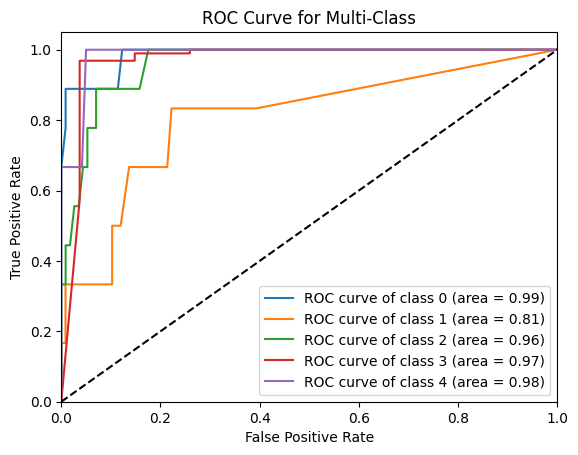

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]


# Assuming you are using a model with predict_proba:
#y_pred_proba = svc.predict_proba(X_test)

# Calculate ROC AUC for multi-class (One-vs-Rest)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') # Using probabilities for multiclass ROC AUC

print(f'AUC: {roc_auc * 100:.2f}%')


# Calculate and plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

*Model Importance*

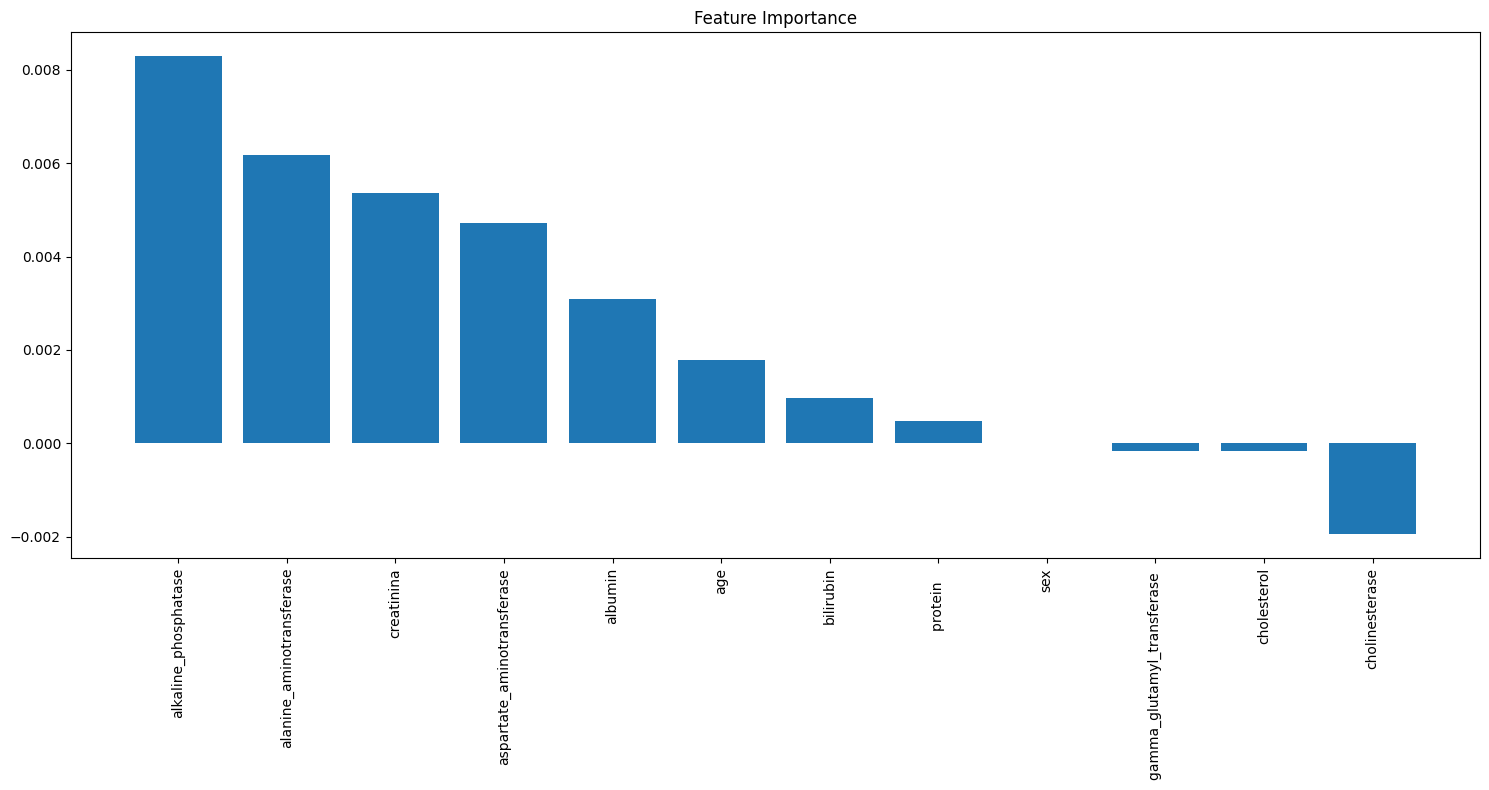

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Calculated permutation feature importance.
result = permutation_importance(svc, X, y, n_repeats=10, random_state=42)
importances = result.importances_mean   # Get feature importance from permutation importance.
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)
plt.tight_layout()
plt.show()

*Cross Validation Score*

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svc, X, y, cv = 5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()*100:.2f}%')

Cross-validation scores: [0.91056911 0.91869919 0.90243902 0.88617886 0.88617886]
Mean cross-validation score: 90.08%


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9329268292682927


# ***Decision Tree Classifier***

**Model Building**

*The Decision Tree Classifier Model*

In [ ]:
from sklearn.tree import DecisionTreeClassifier   # A model that creates a tree-like structure to make decisions.

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Model Evaluation**

*Prediction*

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
y_pred

array([3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 1, 0, 3, 2, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.55%


*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')   # Print confusion matrix.
print(conf_matrix)   # Print the confusion matrix

Confusion Matrix:
[[ 2  3  1  2  1]
 [ 0  2  0  4  0]
 [ 1  2  3  3  0]
 [ 0  0  1 95  0]
 [ 0  0  0  1  2]]


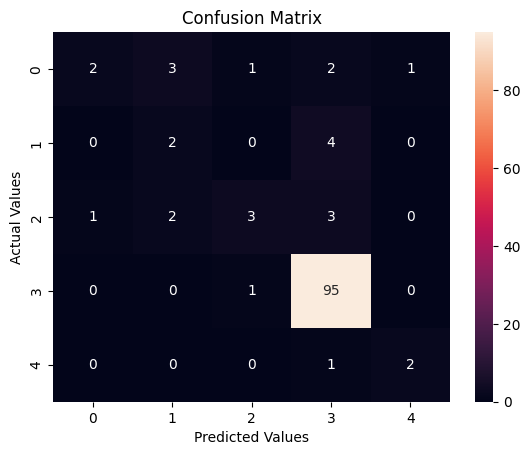

In [ ]:
# Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.

sns.heatmap(conf_matrix, annot = True, fmt = 'd')   # Create a heatmap with a blue color palette.
plt.title('Confusion Matrix')   # Set the title of the heatmap.
plt.ylabel('Actual Values')   # Set the label for the y-axis.
plt.xlabel('Predicted Values')   # Set the label for the x-axis.
plt.show()   # Display the heatmap.

*Precision, Recall and F1 Score*

In [ ]:
from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')   # Print classification report.
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.29      0.33      0.31         6
           2       0.60      0.33      0.43         9
           3       0.90      0.99      0.95        96
           4       0.67      0.67      0.67         3

    accuracy                           0.85       123
   macro avg       0.62      0.51      0.54       123
weighted avg       0.83      0.85      0.82       123



ROC_AUC_Score, ROC_Curve.

AUC: 0.7097384352976459


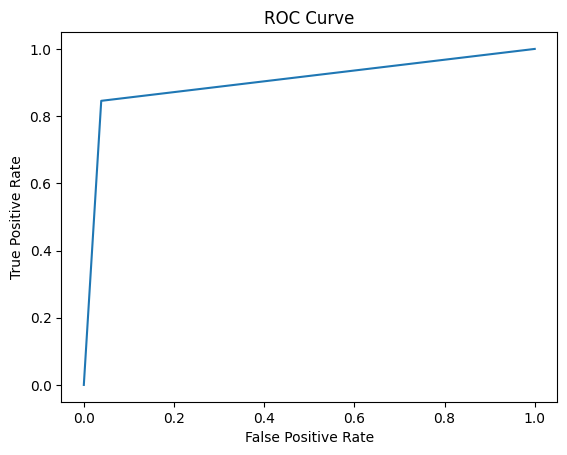

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

roc_auc = roc_auc_score(y_test_bin, y_pred_bin)
print(f'AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

*Model Importances*

<function matplotlib.pyplot.show(close=None, block=None)>

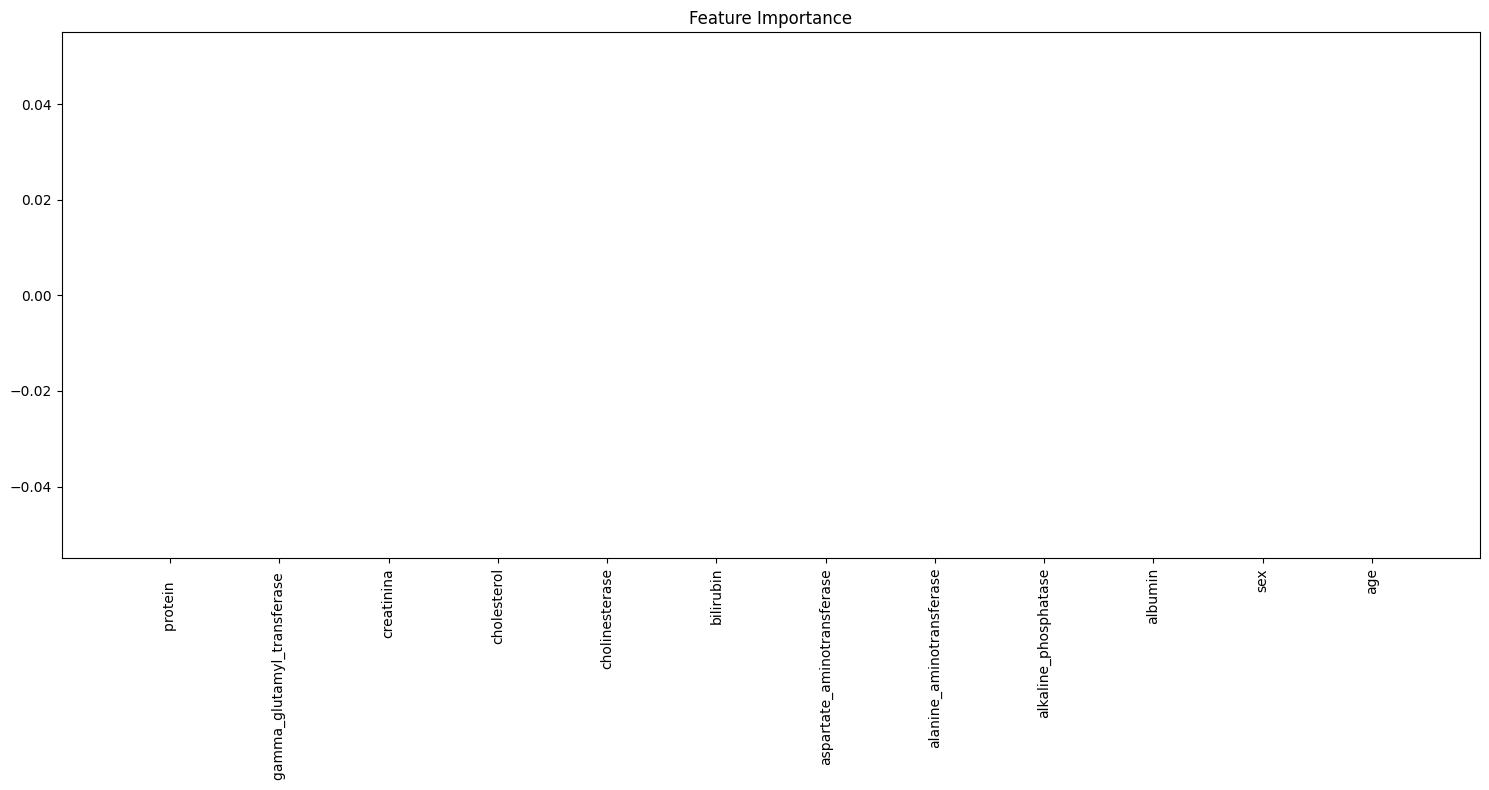

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(dt, X, y, n_repeats=10, random_state=42)
importances = result.importances_mean   # Get feature importance from permutation importance.
indices = np.argsort(importances)[::-1]   # Sort the indices of the importance.

plt.figure(figsize = (15, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)
plt.tight_layout()
plt.show

*Cross Validation Score*

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt, X, y, cv = 5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.91056911 0.88617886 0.91869919 0.88617886 0.87804878]
Mean cross-validation score: 0.8959349593495937


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9308943089430896


# **Gradient Boosting Classifier**

**Model Building**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier   # An ensemble method that combines multiple weak learners to create a strong learner.

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

**Model Evaluation**

*Prediction*

In [ ]:
y_pred = gb.predict(X_test)   # Make predictions on the test set.

In [ ]:
y_pred

array([3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.62%


*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 7  0  0  2  0]
 [ 0  2  0  4  0]
 [ 1  2  3  3  0]
 [ 0  0  0 96  0]
 [ 0  0  0  2  1]]


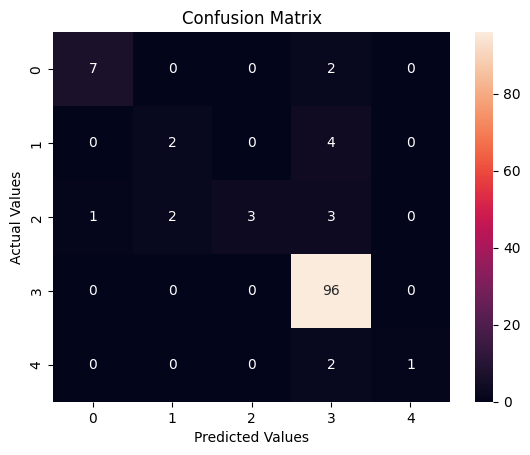

In [ ]:
# Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.

sns.heatmap(conf_matrix, annot = True, fmt = 'd')   # Create a heatmap with a blue color palette.
plt.title('Confusion Matrix')   # Set the title of the heatmap.
plt.ylabel('Actual Values')   # Set the label for the y-axis.
plt.xlabel('Predicted Values')   # Set the label for the x-axis.
plt.show()   # Display the heatmap.

*Precision, Recall and F1 Score*

In [ ]:
from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')   # Print classification report.
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.50      0.33      0.40         6
           2       1.00      0.33      0.50         9
           3       0.90      1.00      0.95        96
           4       1.00      0.33      0.50         3

    accuracy                           0.89       123
   macro avg       0.85      0.56      0.63       123
weighted avg       0.89      0.89      0.87       123



*ROC_AUC_Score, ROC_Curve*

AUC: 96.29%


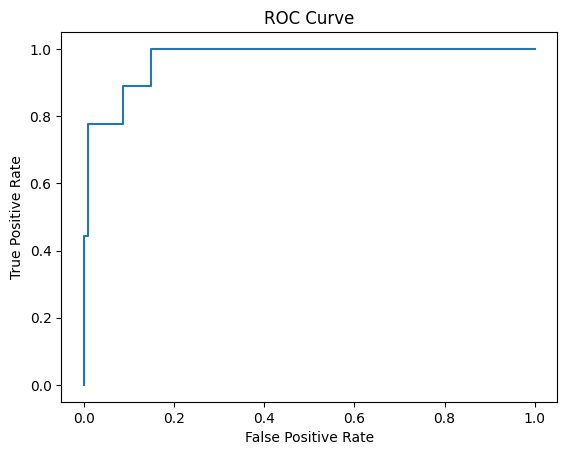

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
#from sklearn.linear_model import LogisticRegression

y_probs = gb.predict_proba(X_test) # Get predicted probabilities

# Calculate ROC AUC score using predicted probabilities
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print(f'AUC: {roc_auc *100:.2f}%')

# Plot ROC curve using predicted probabilities for a specific class (e.g., class 0)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 0], pos_label=0) # Assuming 0 is a class label
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

*feature Importance*

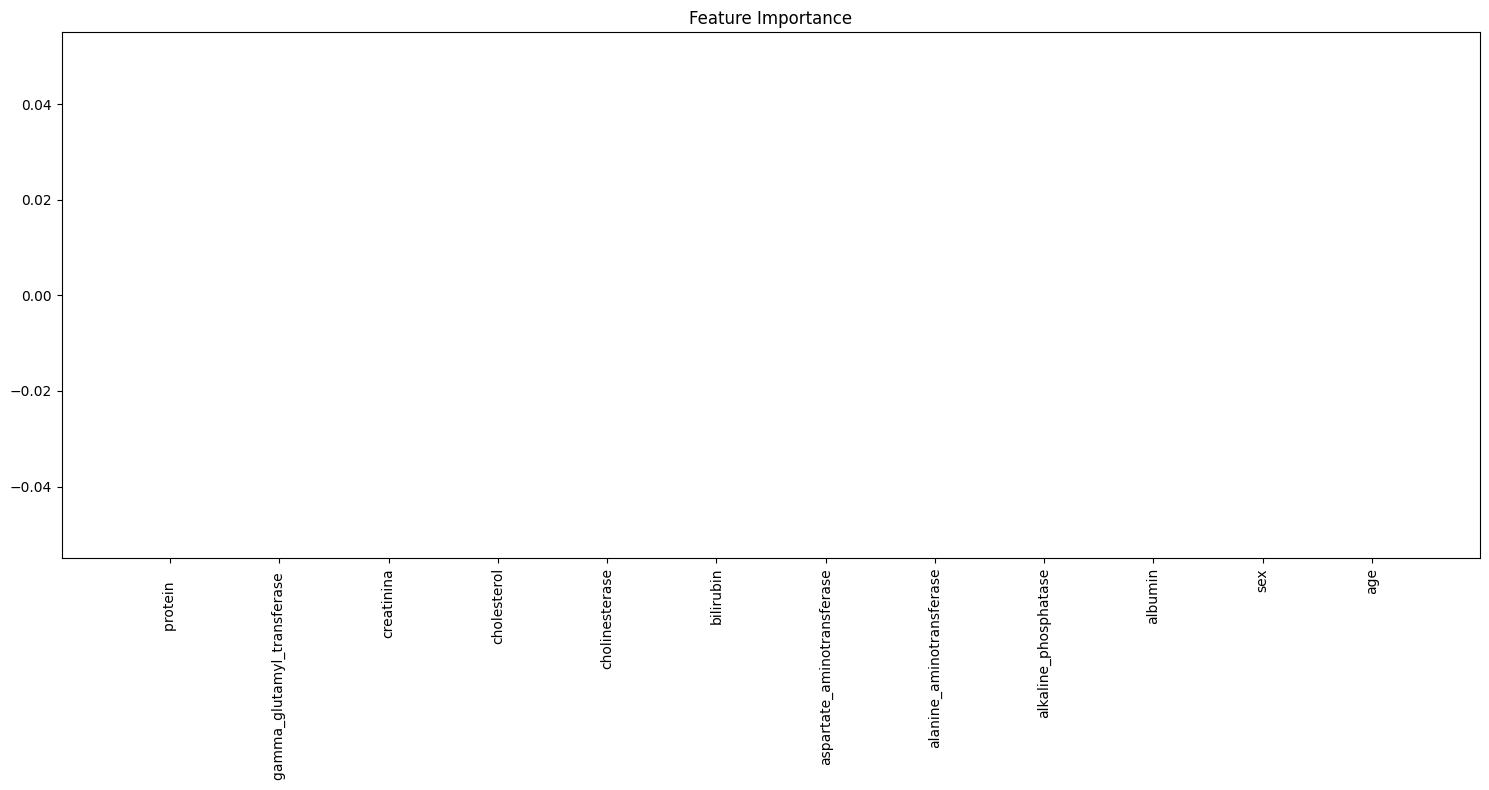

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(gb, X, y, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)
plt.tight_layout()
plt.show()

*Cross Validation*

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb, X, y, cv = 5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()*100:.2f}%')

Cross-validation scores: [0.93495935 0.93495935 0.94308943 0.91869919 0.91056911]
Mean cross-validation score: 92.85%


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score: 0.9390243902439025


#**XGB Classifier**

**Model Selection**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier   # An optimized version of gradient boosting.

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Save the trained model to a file.
import joblib

joblib.dump(xgb, 'liver_disease_model.pkl')

['liver_disease_model.pkl']

**Model Evaluation**

*Prediction*

In [ ]:
y_pred = xgb.predict(X_test)   # Make predictions on the test set.

In [ ]:
y_pred

array([3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.24%


*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')   # Print confusion matrix.
print(conf_matrix)

Confusion Matrix:
[[ 6  0  1  2  0]
 [ 0  3  0  3  0]
 [ 1  1  5  2  0]
 [ 0  0  0 96  0]
 [ 0  0  0  2  1]]


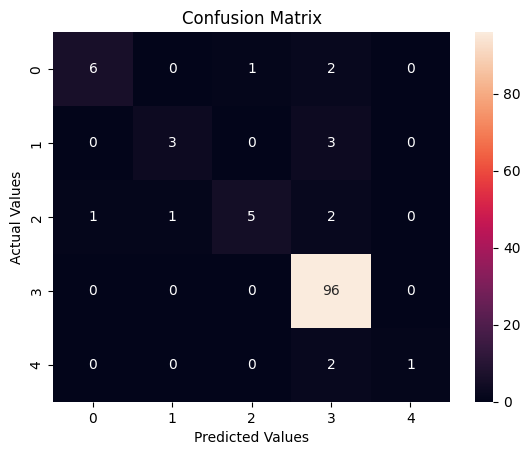

In [ ]:
sns.heatmap(conf_matrix, annot= True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

*Model Score*

In [ ]:
xgb.score(X_train, y_train)

1.0

In [ ]:
xgb.score(X_test, y_test)

0.9024390243902439

*Precision, Recall and F1 Score*

In [ ]:
from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')   # Print classification report.
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.75      0.50      0.60         6
           2       0.83      0.56      0.67         9
           3       0.91      1.00      0.96        96
           4       1.00      0.33      0.50         3

    accuracy                           0.90       123
   macro avg       0.87      0.61      0.69       123
weighted avg       0.90      0.90      0.89       123



* ROC_AUC_Score, ROC Curve*

AUC: 0.7696131354026091


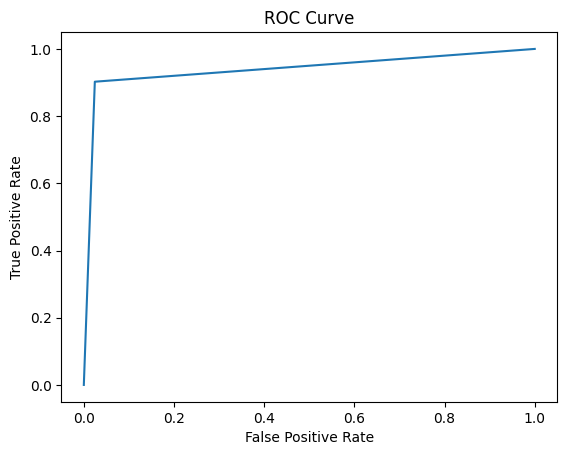

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test)) # changed to y_pred

roc_auc = roc_auc_score(y_test_bin, y_pred_bin)
print(f'AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

*Feature Importance*

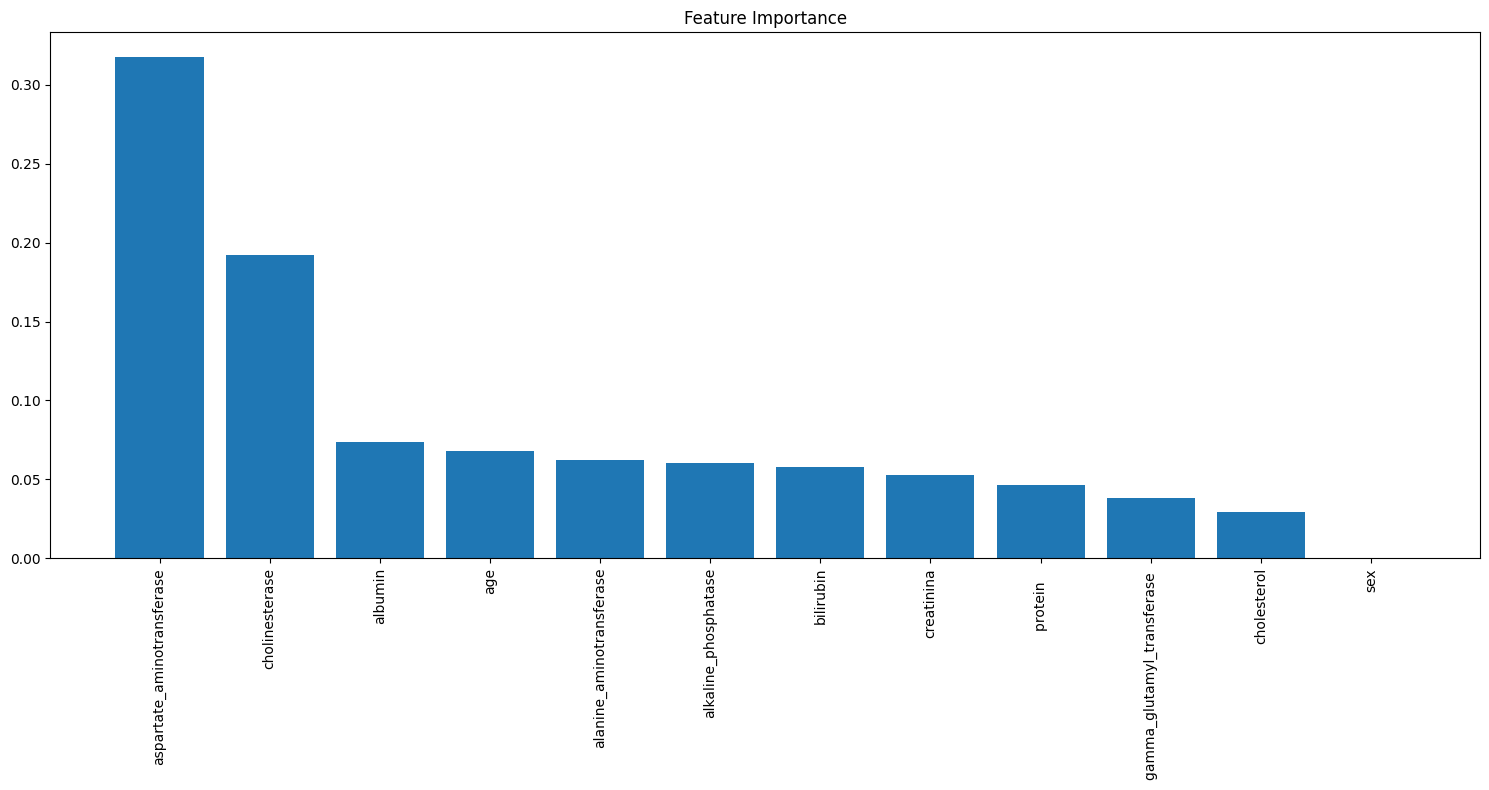

In [ ]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_   # Get feature importance from the model.
indices = np.argsort(importances)[::-1]   # Sort the indices of the importance.

plt.figure(figsize = (15, 8))   # Set the figure size.
plt.title('Feature Importance')   # Set the title of the plot.
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)

plt.tight_layout()
plt.show()

**Model Tuning**

*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters : {grid_search.best_params_}')   # Best hyperparameters.
print(f'Best cross-validation Score : {grid_search.best_score_}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation Score : 0.9410569105691057


*Cross-Validation*

In [ ]:
from sklearn.model_selection import cross_val_score   # A method to evaluate the performance of a model on a dataset.

cv_scores = cross_val_score(xgb, X, y, cv = 5)
print(f'Cross-validation scores: {cv_scores}')   # Print the cross-validation scores.
print(f'Mean cross-validation score: {cv_scores.mean() * 100:.2f}%')   # Calculate and print the mean cross-validation score.

Cross-validation scores: [0.95121951 0.94308943 0.96747967 0.91056911 0.90243902]
Mean cross-validation score: 93.50%


# **k-Nearest Neighbors (k-NN)**

**Model Building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier   # A simple algorithm that classifies data points based on their proximity to neighbors.

model = KNeighborsClassifier(n_neighbors = 5)   # You can adjust the number of neighbors (k) as needed.
model.fit(X_train, y_train)

KNeighborsClassifier()

**Model Evaluation**

*Prediction*

In [ ]:
y_pred = model.predict(X_test)   # Make predictions on the test set.

In [ ]:
y_pred

array([3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

*Accuracy Score*

In [ ]:
from sklearn.metrics import accuracy_score   # A metric that measures the accuracy of a classification model.

accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.30%


*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix   # A table that summarizes the performance of a classification model.

conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
print('Confusion Matrix:')   # Print confusion matrix.
print(conf_matrix)

Confusion Matrix:
[[ 3  0  0  6  0]
 [ 0  1  0  5  0]
 [ 1  1  0  7  0]
 [ 0  0  0 96  0]
 [ 1  0  0  2  0]]


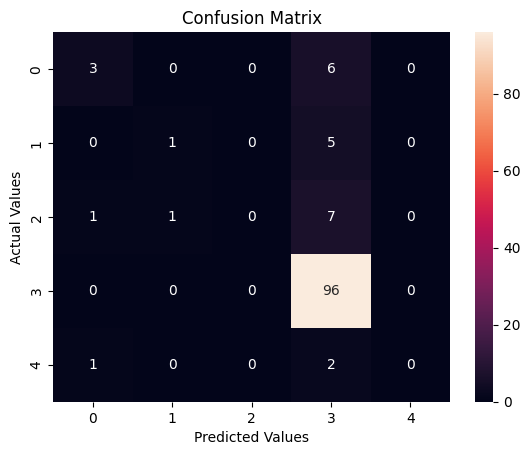

In [ ]:
# Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.

sns.heatmap(conf_matrix, annot = True, fmt = 'd')   # Create a heatmap with a blue color palette.
plt.title('Confusion Matrix')   # Set the title of the heatmap.
plt.ylabel('Actual Values')   # Set the label for the y-axis.
plt.xlabel('Predicted Values')   # Set the label for the x-axis.
plt.show()   # Display the heatmap.

*Precision, Recall and F1 Score*

In [ ]:
from sklearn.metrics import classification_report   # A report that provides precision, recall, and F1-score for each class.

class_report = classification_report(y_test, y_pred)   # Create a classification report.
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         9
           3       0.83      1.00      0.91        96
           4       0.00      0.00      0.00         3

    accuracy                           0.81       123
   macro avg       0.39      0.30      0.32       123
weighted avg       0.71      0.81      0.75       123



*Cross Validation*

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv = 5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean() * 100:.2f}%')

Cross-validation scores: [0.91869919 0.91056911 0.92682927 0.88617886 0.89430894]
Mean cross-validation score: 90.73%


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9288617886178862


# **All Models Evaluation**

In [ ]:
models = [lr, rf, svc, dt, gb, xgb, model]   # A list of all the models I've built.
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'k-NN']   # Corresponding names for each model.

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)   # Make predictions on the test set.
    accuracy = accuracy_score(y_test, y_pred)   # Calculate accuracy.
    conf_matrix = confusion_matrix(y_test, y_pred)   # Create a confusion matrix.
    class_report = classification_report(y_test, y_pred)

    print(f'\nModel : {name}')   # Print the model name.
    print(f'Accuracy : {accuracy * 100:.2f}%')   # Print accuracy.

    print('Confusion Matrix :')   # Print confusion matrix.
    print(conf_matrix)   # Print the confusion matrix.

    print('Classification Report :')   # Print classification report.
    print(class_report)  # print classification report.

    print('-' * 50)  # print a separator for better readability


Model : Logistic Regression
Accuracy : 88.62%
Confusion Matrix :
[[ 5  0  0  3  1]
 [ 0  3  0  3  0]
 [ 1  2  3  3  0]
 [ 0  0  0 96  0]
 [ 0  0  0  1  2]]
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.60      0.50      0.55         6
           2       1.00      0.33      0.50         9
           3       0.91      1.00      0.95        96
           4       0.67      0.67      0.67         3

    accuracy                           0.89       123
   macro avg       0.80      0.61      0.67       123
weighted avg       0.89      0.89      0.87       123

--------------------------------------------------

Model : Random Forest
Accuracy : 86.18%
Confusion Matrix :
[[ 7  0  0  2  0]
 [ 0  2  0  4  0]
 [ 0  1  1  7  0]
 [ 0  0  0 96  0]
 [ 0  1  0  2  0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      

#**Accuracy Improvment**

*XGB Model*

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Accuracy: 92.68%
ROC AUC Score for class 0: 0.9795
ROC AUC Score for class 1: 0.9658


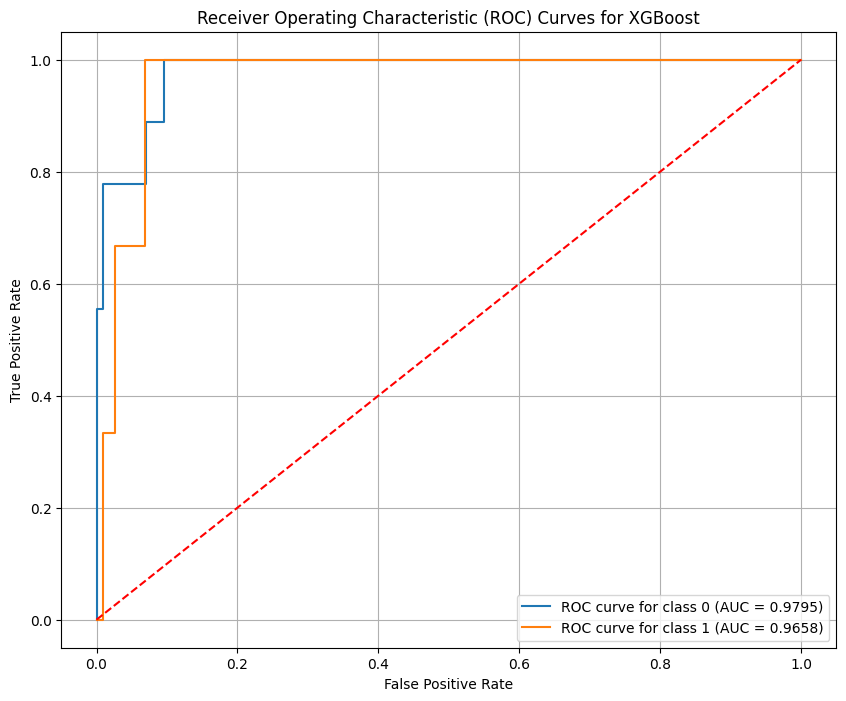

Best XGBoost model saved successfully!


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_resampled, y_resampled)

# Best parameters from random search
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

# Train final model with the best parameters
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_best.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_best.predict(X_test)
y_scores = xgb_best.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Binarize the output for ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1])
n_classes = y_test_bin.shape[1]

# Calculate ROC AUC for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

# Print individual ROC AUC scores
for i in range(n_classes):
    print(f'ROC AUC Score for class {i}: {roc_auc[i]:.4f}')

# Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Save the best model
joblib.dump(xgb_best, 'liver_disease_model.pkl')
print("Best XGBoost model saved successfully!")

*Random Forest Model*

Accuracy: 88.62%
ROC AUC Score for class 0: 0.9907
ROC AUC Score for class 1: 0.9566


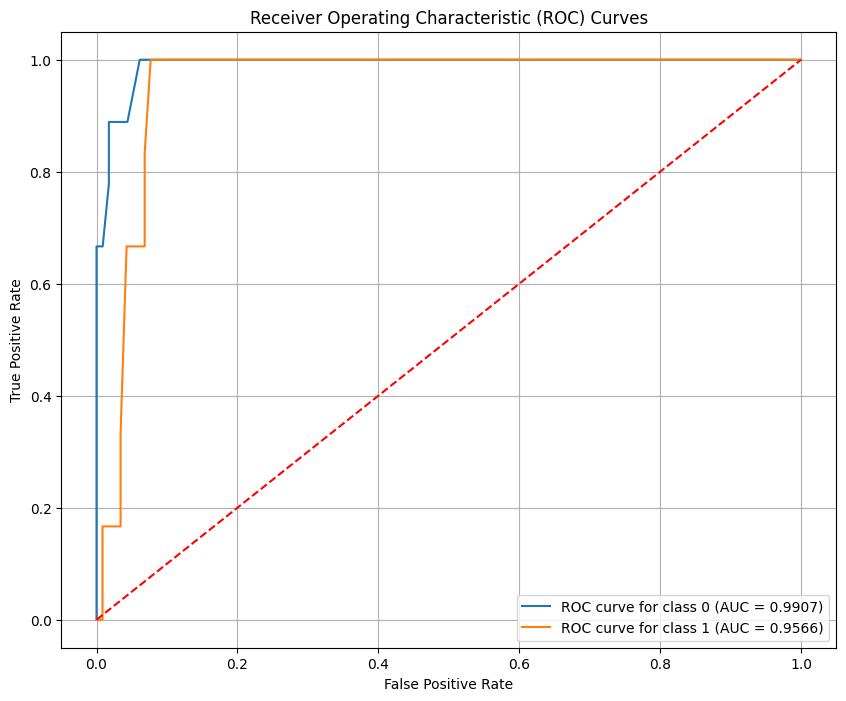

Best Random Forest model saved successfully!


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import joblib

# Step 1: Handle class imbalance using SMOTE
sm = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Step 2: Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Step 3: Fit the model
rf.fit(X_resampled, y_resampled)

# Step 4: Make predictions
y_pred = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)  # Get the probabilities for all classes

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 6: Binarize the output for ROC AUC calculation
#there are 3 classes: 0, 1 you can create binary variables for each class
y_test_bin = label_binarize(y_test, classes=[0, 1])
n_classes = y_test_bin.shape[1]

# Step 7: Calculate ROC AUC for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

# Print individual ROC AUC scores
for i in range(n_classes):
    print(f'ROC AUC Score for class {i}: {roc_auc[i]:.4f}')

# Step 8: Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 9: Save the best model
joblib.dump(rf, 'random_forest_best_model.pkl')
print("Best Random Forest model saved successfully!")

#**Pickling The Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(xgb_best, 'liver_disease_model.pkl')

['liver_disease_model.pkl']

In [ ]:
filename = 'liver_disease_model.pkl'
joblib.dump(xgb_best, open(filename, 'wb'))

In [ ]:
load_model = joblib.load('liver_disease_model.pkl')

In [ ]:
load_model = joblib.load(open(filename, 'rb'))

In [ ]:
model_score_r1 = load_model.score(X_test, y_test)

In [ ]:
model_score_r1

0.926829268292683

# **Model Deployment**

*Install Streamlit and Other Libraries*

In [ ]:
!pip install streamlit pandas scikit-learn joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.0 MB/s eta 0:00:00


*Export the Model*

In [ ]:
import joblib

joblib.dump(xgb, 'liver_disease_model.pkl')

#joblib.dump(rf, 'random_forest_best_model.pkl')

['liver_disease_model.pkl']

**Create the Streamlit App**

*Import Libraries*

In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler


# Load the trained model
model = joblib.load('liver_disease_model.pkl')

#model = joblib.load('random_forest_best_model.pkl')

*Define User Input Features*

In [ ]:
def get_user_input():
    age = st.number_input('Age', min_value=1, max_value=100, value= 1)
    gender = st.selectbox('Gender', ['Male', 'Female'])
    albumin = st.number_input('Albumin', min_value=0.0, max_value=10.0, value=4.0)
    alkaline_phosphatase = st.number_input('Alkaline Phosphatase', min_value=0, max_value=1000, value=30)
    alanine_aminotransferase = st.number_input('Alanine Aminotransferase', min_value=0, max_value=1000, value=30)
    aspartate_aminotransferase = st.number_input('Aspartate Aminotransferase', min_value=0, max_value=1000, value=30)
    bilirubin = st.number_input('Total Bilirubin', min_value=0.0, max_value=100.0, value=1.0)
    cholinesterase = st.number_input('Cholinesterase', min_value=0, max_value=1000, value=30)
    cholesterol = st.number_input('Cholesterol', min_value=0, max_value=1000, value=30)
    creatinina = st.number_input('Creatinina', min_value=0.0, max_value=1000.0, value=1.0)
    gamma_glutamyl_transferase = st.number_input('Gamma Glutamyltransferase', min_value=0, max_value=1000, value=30)
    protein = st.number_input('Protein', min_value=0, max_value=1000, value=30)

# Create a dictionary with user input values.

    user_data = {
        'age': age,
        'gender': gender,
        'albumin': albumin,
        'alkaline_phosphatase': alkaline_phosphatase,
        'alanine_aminotransferase': alanine_aminotransferase,
        'aspartate_aminotransferase': aspartate_aminotransferase,
        'bilirubin': bilirubin,
        'cholinesterase': cholinesterase,
        'cholesterol': cholesterol,
        'creatinina': creatinina,
        'gamma_glutamyl_transferase': gamma_glutamyl_transferase,
        'protein': protein
    }

# Convert it into a DataFrame for model input.
    features = pd.DataFrame(user_data, index=[0])
    return features

def preprocess_data(input_data):
    # Encode 'gender' as numeric: Male -> 0, Female -> 1
    input_data['gender'] = input_data['gender'].map({'Male': 0, 'Female': 1})

    # Return the processed input
    return input_data

# Function to predict liver disease based on user input.
def predict_liver_disease(user_data):
    prediction = model.predict(user_data)
    return prediction

# Main function for Streamlit app.
def main():
    st.title('Liver Disease Prediction')

    user_data = get_user_input()

    # Preprocess the input data (convert categorical to numeric)
    processed_data = preprocess_data(user_data)

# Button to trigger prediction.
    if st.button('Predict'):
        prediction = predict_liver_disease(processed_data)
        #prediction = predict_liver_disease(user_data)   # Predict liver disease.
        if prediction == 1:
            st.error('The patient is predicted to have liver disease.')
        else:
            st.success('The patient is predicted to not have liver disease.')  # Display prediction result.

# Run the Streamlit app.
if __name__ == '__main__':
    main()

2024-10-21 18:42:56.520 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 18:42:56.801 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-21 18:42:56.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 18:42:56.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 18:42:56.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 18:42:56.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 18:42:56.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 18:42:56.825 Session state does not 

In [ ]:
#streamlit run liverdp.py